In [1]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
try:
    script_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    script_dir = os.getcwd() 
# Define the path to the data folder
parent_dir = os.path.dirname(script_dir)
data_folder = os.path.join(parent_dir, 'data')
print(f"Data folder located at: {data_folder}")

Data folder located at: d:\Github\Deloitte-Machine-Learning-Challenge\data


In [2]:
def load_csv_file(file_path):
    """Loads a CSV file if it exists and returns the DataFrame."""
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        return df
    else:
        print(f"File not found: {file_path}")
        return None
train_csv = os.path.join(data_folder, 'train.csv')
test_csv = os.path.join(data_folder, 'test.csv')

# Load datasets
train_df = load_csv_file(train_csv)
test_df = load_csv_file(test_csv)
# Display preview of training data
if train_df is not None:
    print("Training Data Preview:")
    print(train_df.head())


Training Data Preview:
         ID  Loan Amount  Funded Amount  Funded Amount Investor  Term  \
0  65087372        10000          32236             12329.36286    59   
1   1450153         3609          11940             12191.99692    59   
2   1969101        28276           9311             21603.22455    59   
3   6651430        11170           6954             17877.15585    59   
4  14354669        16890          13226             13539.92667    59   

  Batch Enrolled  Interest Rate Grade Sub Grade Employment Duration  ...  \
0     BAT2522922      11.135007     B        C4            MORTGAGE  ...   
1     BAT1586599      12.237563     C        D3                RENT  ...   
2     BAT2136391      12.545884     F        D4            MORTGAGE  ...   
3     BAT2428731      16.731201     C        C3            MORTGAGE  ...   
4     BAT5341619      15.008300     C        D4            MORTGAGE  ...   

    Recoveries Collection Recovery Fee Collection 12 months Medical  \
0     2.49

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

In [4]:
train_df.describe()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,6.746300e+04,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,...,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.0,67463.000000,6.746300e+04,67463.000000,67463.000000
mean,2.562761e+07,16848.902776,15770.599114,14621.799323,58.173814,11.846258,80541.502522,23.299241,0.327127,0.145754,...,1.143969,59.691578,1.125141,0.021301,71.163260,0.0,146.467990,1.595739e+05,23123.005544,0.092510
std,2.109155e+07,8367.865726,8150.992662,6785.345170,3.327441,3.718629,45029.120366,8.451824,0.800888,0.473291,...,5.244365,357.026346,3.489885,0.144385,43.315845,0.0,744.382233,1.390332e+05,20916.699999,0.289747
min,1.297933e+06,1014.000000,1014.000000,1114.590204,36.000000,5.320006,14573.537170,0.675299,0.000000,0.000000,...,0.000003,0.000036,0.000036,0.000000,0.000000,0.0,1.000000,6.170000e+02,1000.000000,0.000000
25%,6.570288e+06,10012.000000,9266.500000,9831.684984,58.000000,9.297147,51689.843335,16.756416,0.000000,0.000000,...,0.021114,1.629818,0.476259,0.000000,35.000000,0.0,24.000000,5.037900e+04,8155.500000,0.000000
50%,1.791565e+07,16073.000000,13042.000000,12793.682170,59.000000,11.377696,69335.832680,22.656658,0.000000,0.000000,...,0.043398,3.344524,0.780141,0.000000,68.000000,0.0,36.000000,1.183690e+05,16733.000000,0.000000
75%,4.271521e+07,22106.000000,21793.000000,17807.594120,59.000000,14.193533,94623.322785,30.048400,0.000000,0.000000,...,0.071884,5.453727,1.070566,0.000000,105.000000,0.0,46.000000,2.283750e+05,32146.500000,0.000000
max,7.224578e+07,35000.000000,34999.000000,34999.746430,59.000000,27.182348,406561.536400,39.629862,8.000000,5.000000,...,42.618882,4354.467419,166.833000,1.000000,161.000000,0.0,16421.000000,1.177412e+06,201169.000000,1.000000


In [5]:
test_df.describe()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,2.891300e+04,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,...,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,2.891300e+04,28913.000000,0.0
mean,2.944966e+07,16404.027462,15619.911113,14741.536698,54.543078,12.187577,79983.752348,22.159266,0.332065,0.276900,...,0.922863,50.624944,1.393220,0.019576,65.007574,0.000968,159.747553,1.530975e+05,25013.808425,NaN
std,2.206842e+07,8358.898287,8229.977503,7230.397758,8.991800,3.911259,45231.316383,8.657629,0.818869,0.663999,...,4.765042,336.450176,15.139809,0.138540,42.494090,0.031105,911.671785,1.391309e+05,22284.519460,NaN
min,1.297893e+06,1000.000000,1000.000000,1000.000000,36.000000,5.320000,14907.925920,0.730000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.260000e+02,1000.000000,NaN
25%,8.272049e+06,9776.000000,9175.000000,9695.445501,58.000000,9.422042,50791.000000,15.622891,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,29.000000,0.000000,3.000000,4.397200e+04,9325.000000,NaN
50%,2.596622e+07,15600.000000,13200.000000,12930.601270,59.000000,11.688652,68894.324470,21.530000,0.000000,0.000000,...,0.027878,2.165909,0.579620,0.000000,60.000000,0.000000,30.000000,1.092860e+05,18848.000000,NaN
75%,4.855801e+07,21651.000000,21552.000000,19226.397540,59.000000,14.640000,94684.941810,28.840000,0.000000,0.000000,...,0.061107,4.610188,0.974739,0.000000,95.000000,0.000000,44.000000,2.222960e+05,33860.000000,NaN
max,7.226845e+07,35000.000000,35000.000000,35000.000000,60.000000,27.310000,406944.859000,39.629977,9.000000,5.000000,...,42.520996,4325.594909,743.166000,1.000000,161.000000,1.000000,27076.000000,1.183282e+06,233500.000000,NaN


In [6]:
train_df['Loan Status'].value_counts()

Loan Status
0    61222
1     6241
Name: count, dtype: int64

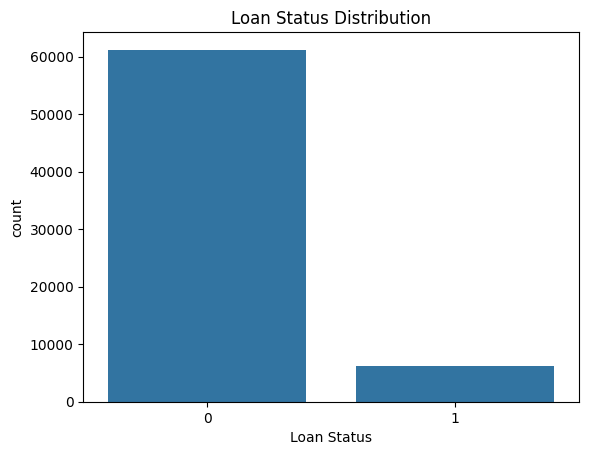

In [7]:
if train_df is not None:
    #print("Columns:", train_df.columns)
    sns.countplot(x='Loan Status', data=train_df)
    plt.title('Loan Status Distribution')
    plt.show()

In [8]:
# Function to build a normalized mapping dictionary
def build_loan_type_map(raw_mapping):
    return {key.strip().lower(): value for key, value in raw_mapping.items()}

# Cleaned and consolidated mapping
raw_loan_type_map = {
    # Debt Consolidation
    "debt consolidation": "Debt_Consolidation_Loan", "credit consolidation": "Debt_Consolidation_Loan",
    "debt consolidation loan": "Debt_Consolidation_Loan", "loan consolidation": "Debt_Consolidation_Loan",
    "bill consolidation": "Debt_Consolidation_Loan", "consolidation": "Debt_Consolidation_Loan",
    "card consolidation": "Debt_Consolidation_Loan", "consolidated": "Debt_Consolidation_Loan",
    "dept consolidation": "Debt_Consolidation_Loan", "debt consolidation 2013": "Debt_Consolidation_Loan",
    "conso": "Debt_Consolidation_Loan", "get out of debt": "Debt_Consolidation_Loan",
    "consolidation loan": "Debt_Consolidation_Loan", "debt loan": "Debt_Consolidation_Loan",
    "loan 1": "Debt_Consolidation_Loan", "loan": "Debt_Consolidation_Loan", "myloan": "Debt_Consolidation_Loan",
    "my loan": "Debt_Consolidation_Loan", "lending club": "Debt_Consolidation_Loan",
    "lending loan": "Debt_Consolidation_Loan", "freedom": "Debt_Consolidation_Loan",
    # Credit Card Refinance / Consolidation
    "credit card refinancing": "Credit_Card_Refinance", "credit card consolidation": "Credit_Card_Refinance",
    "credit cards": "Credit_Card_Refinance", "credit card": "Credit_Card_Refinance",
    "cc refi": "Credit_Card_Refinance", "cc refinance": "Credit_Card_Refinance",
    "credit card refi": "Credit_Card_Refinance", "credit card refinance": "Credit_Card_Refinance",
    "credit card refinance loan": "Credit_Card_Refinance", "cc loan": "Credit_Card_Refinance",
    "credit card payoff": "Credit_Card_Refinance", "credit card pay off": "Credit_Card_Refinance",
    "credit card paydown": "Credit_Card_Refinance", "cc": "Credit_Card_Refinance",
    "credit card debt": "Credit_Card_Refinance", "credit loan": "Credit_Card_Refinance",
    "credit payoff": "Credit_Card_Refinance", "credit pay off": "Credit_Card_Refinance",
    "cards": "Credit_Card_Refinance", "cc-refinance": "Credit_Card_Refinance",
    # Home Related
    "home improvement": "Home_Loan", "home improvement loan": "Home_Loan", "home buying": "Home_Loan",
    "home loan": "Home_Loan", "home": "Home_Loan", "house": "Home_Loan",
    "bathroom": "Home_Loan", "pool": "Home_Loan",
    # Medical
    "medical": "Medical_Loan", "medical expenses": "Medical_Loan", "medical loan": "Medical_Loan",
    # Refinance (General)
    "refinance": "Refinance_Loan", "refinance loan": "Refinance_Loan", "refi": "Refinance_Loan",
    # Car
    "car financing": "Car_Loan", "car loan": "Car_Loan",
    # Business
    "business": "Business_Loan",
    # Moving / Relocation
    "moving and relocation": "Relocation_Loan",
    # Vacation / Major Purchase
    "vacation": "Personal_Loan", "major purchase": "Personal_Loan", "wedding loan": "Personal_Loan",
    # Personal Loan (Generic)
    "personal loan": "Personal_Loan", "personal": "Personal_Loan",
    # Debt Free / Catch-all for payoffs
    "payoff": "Debt_Consolidation_Loan", "pay off": "Debt_Consolidation_Loan",
    "bill payoff": "Debt_Consolidation_Loan", "debt free": "Debt_Consolidation_Loan",
    "debt reduction": "Debt_Consolidation_Loan", "getting ahead": "Debt_Consolidation_Loan",
    "pay off bills": "Debt_Consolidation_Loan", "bills": "Debt_Consolidation_Loan"
}

loan_type_map = build_loan_type_map(raw_loan_type_map)
classify_loan = lambda title: loan_type_map.get(title.strip().lower(), "NA")
# Apply 
train_df['Loan_Type'] = train_df['Loan Title'].apply(classify_loan)
test_df['Loan_Type'] = test_df['Loan Title'].apply(classify_loan)

# drop loan title column at the end 
train_df.drop(columns=['Loan Title'], inplace=True)
test_df.drop(columns=['Loan Title'], inplace=True)

Loan_Type
Credit_Card_Refinance      31265
Debt_Consolidation_Loan    29380
NA                          2787
Home_Loan                   2467
Personal_Loan                751
Medical_Loan                 258
Business_Loan                183
Relocation_Loan              157
Car_Loan                     144
Refinance_Loan                71
Name: count, dtype: int64


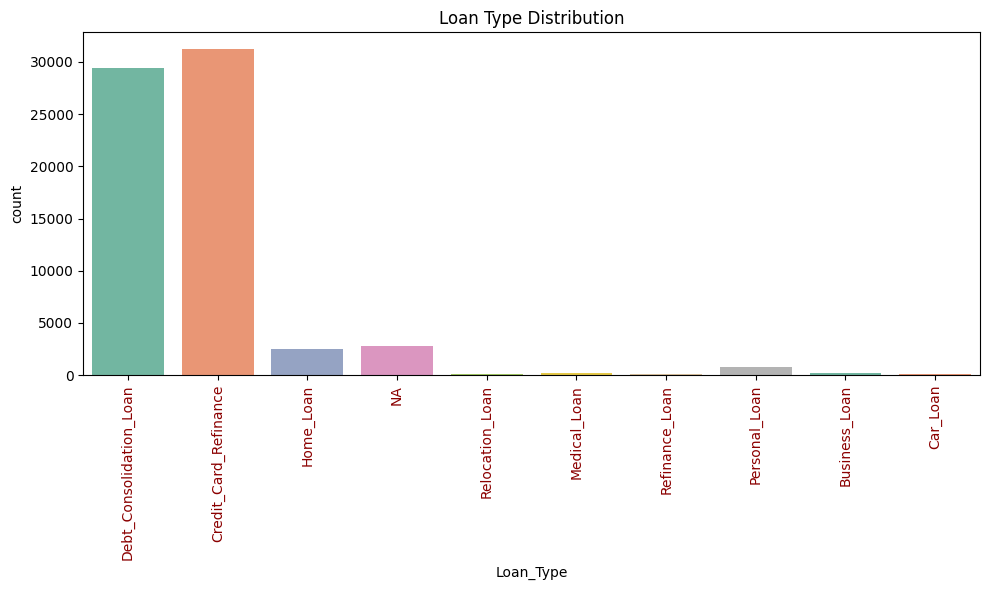

In [9]:
def plot_loan_type_distribution(df, column='Loan_Type', title='Loan Type Distribution', palette='Set2'):
    if column not in df.columns:
        print(f"Column '{column}' not found in DataFrame.")
        return
    print(df[column].value_counts())
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=df, x=column, palette=palette)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center', color='darkred')
    plt.title(title)
    plt.tight_layout()
    plt.show()
plot_loan_type_distribution(train_df)

In [10]:
for dtype, cols in train_df.dtypes.groupby(train_df.dtypes).groups.items():
    print(f"Data type: {dtype}")
    print(list(cols))
    print()

Data type: int64
['ID', 'Loan Amount', 'Funded Amount', 'Term', 'Delinquency - two years', 'Inquires - six months', 'Open Account', 'Public Record', 'Revolving Balance', 'Total Accounts', 'Collection 12 months Medical', 'Last week Pay', 'Accounts Delinquent', 'Total Collection Amount', 'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status']

Data type: float64
['Funded Amount Investor', 'Interest Rate', 'Home Ownership', 'Debit to Income', 'Revolving Utilities', 'Total Received Interest', 'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee']

Data type: object
['Batch Enrolled', 'Grade', 'Sub Grade', 'Employment Duration', 'Verification Status', 'Payment Plan', 'Initial List Status', 'Application Type', 'Loan_Type']



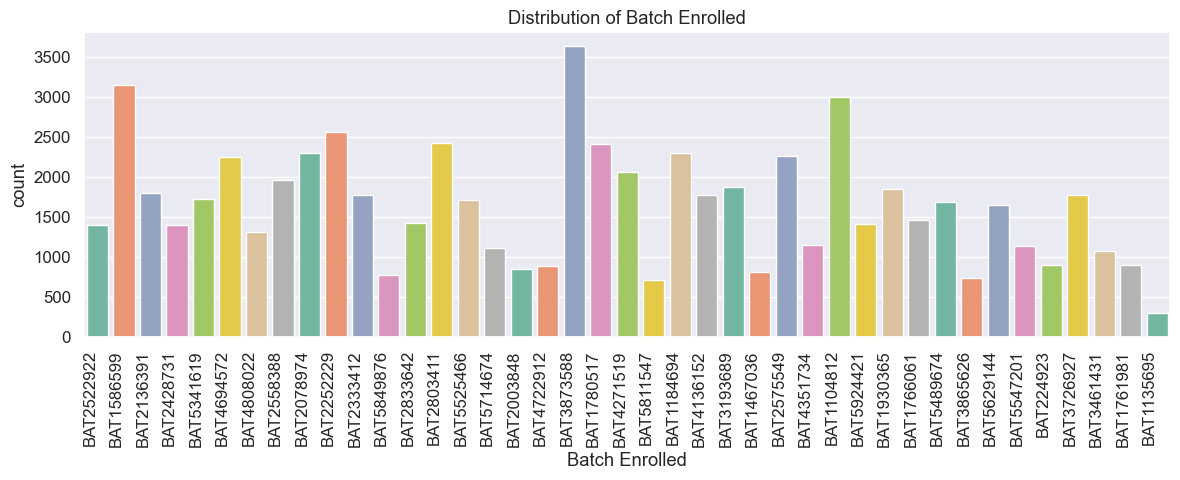

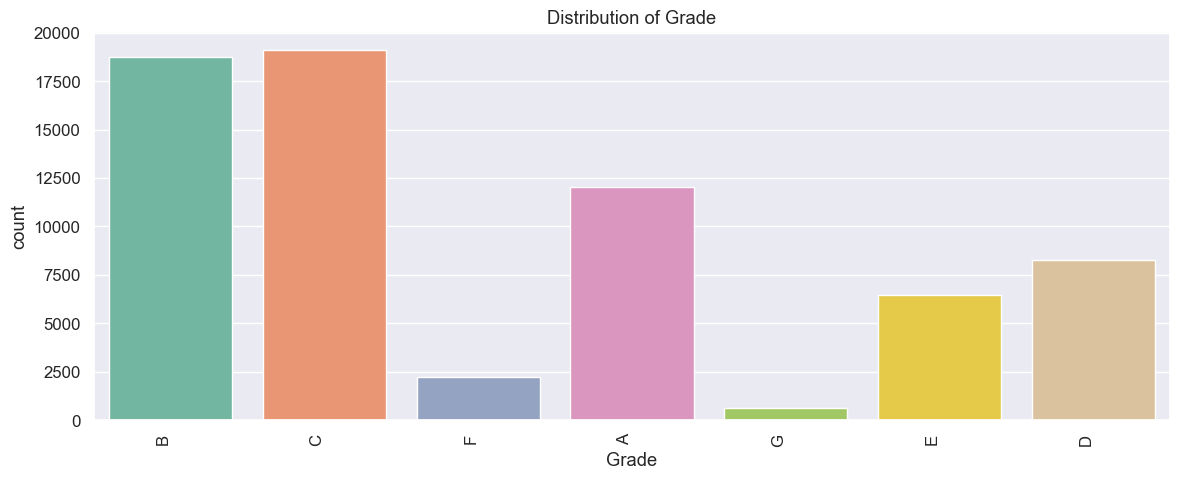

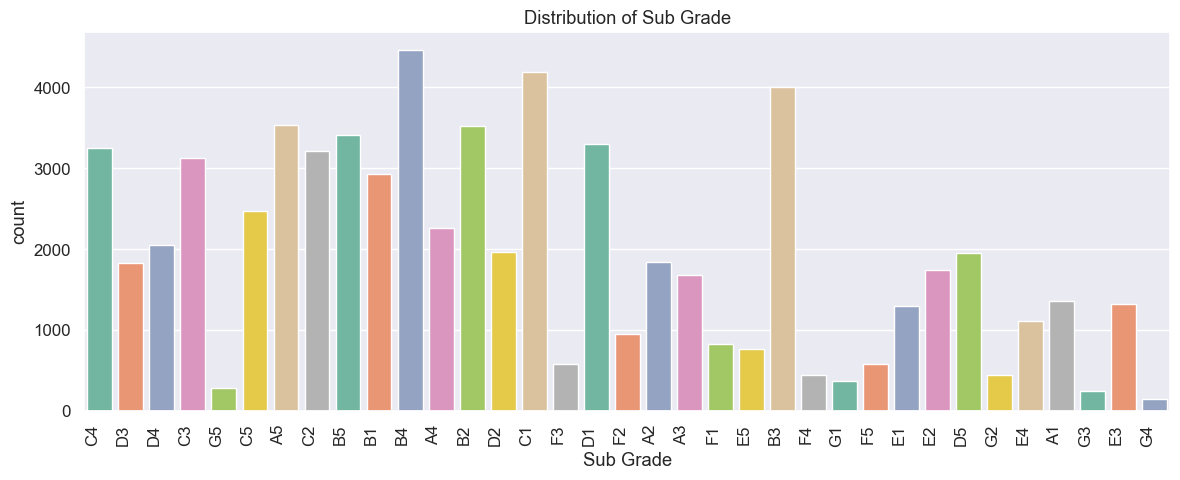

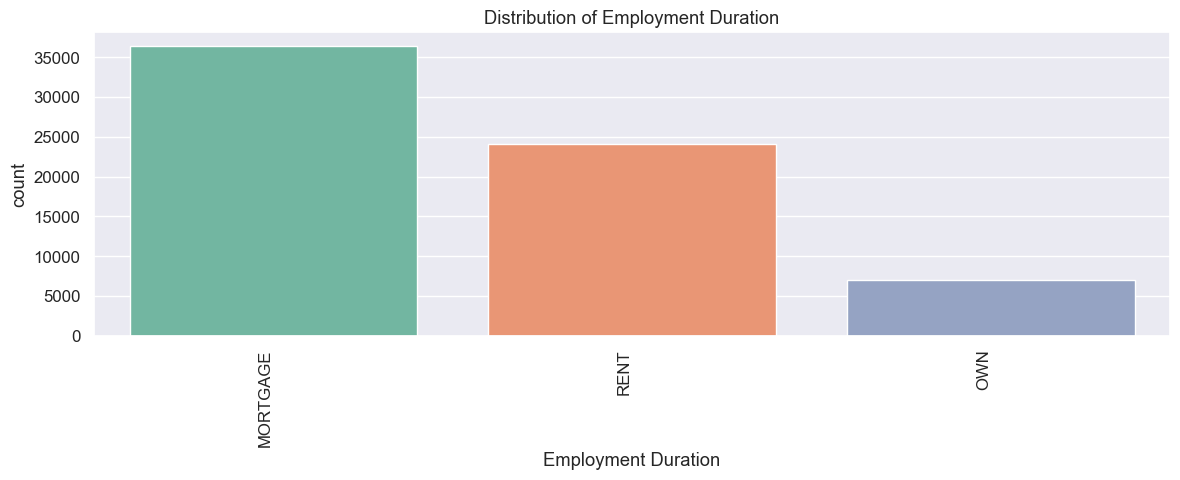

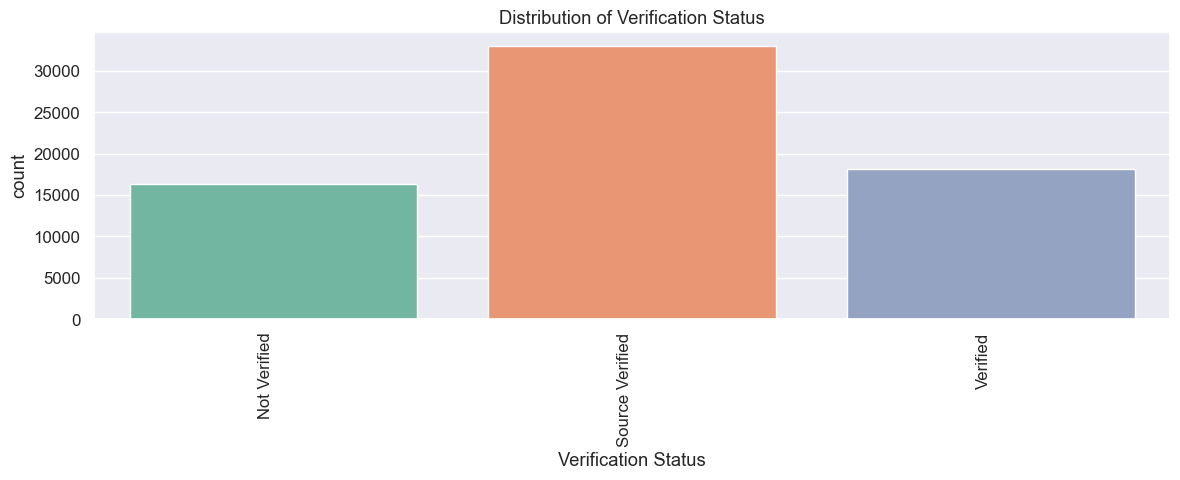

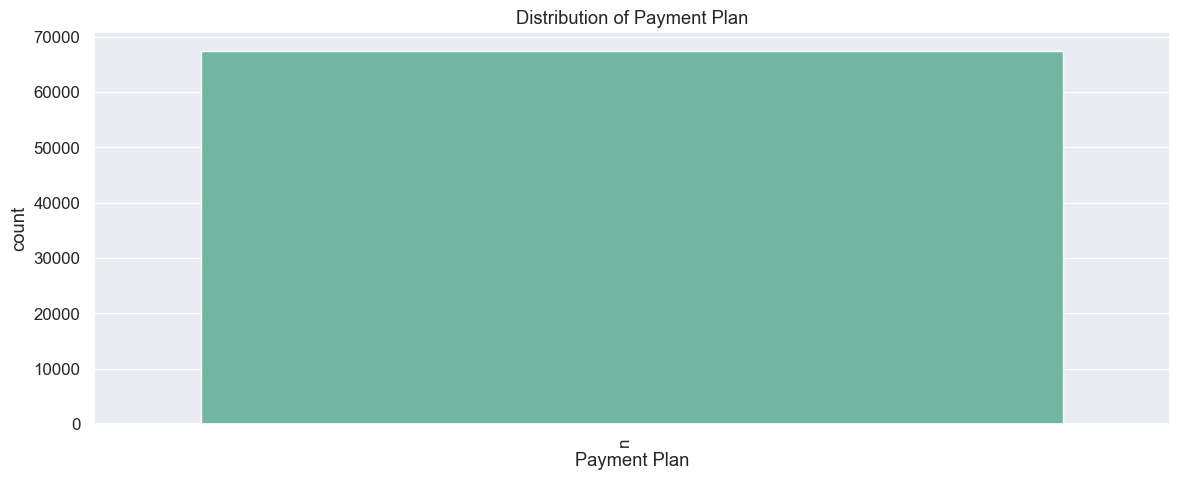

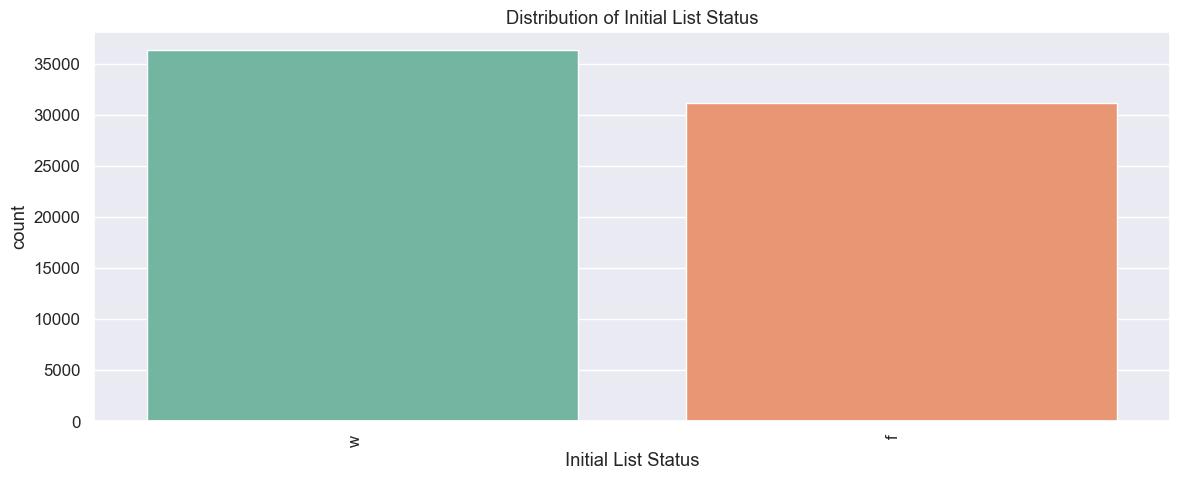

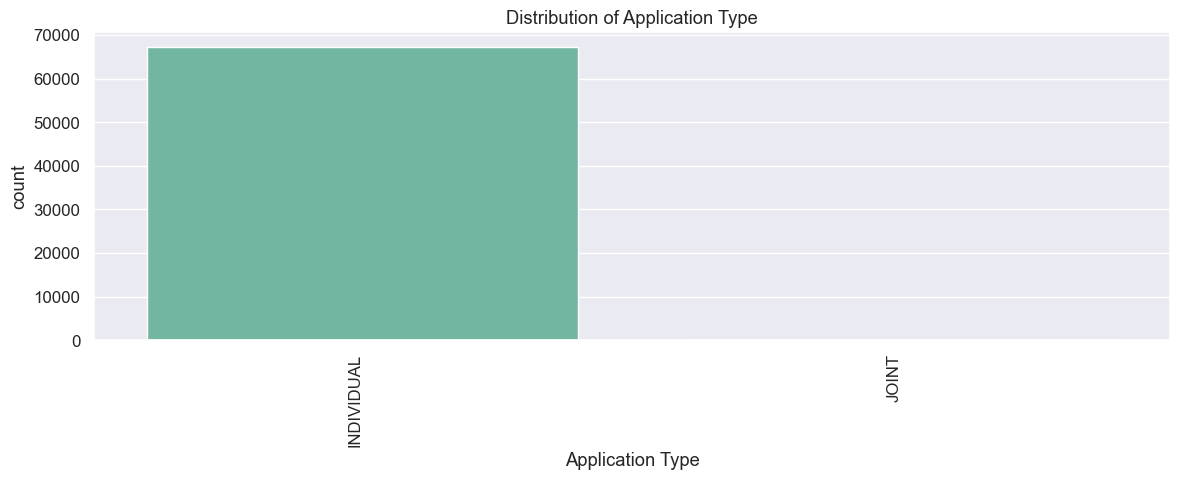

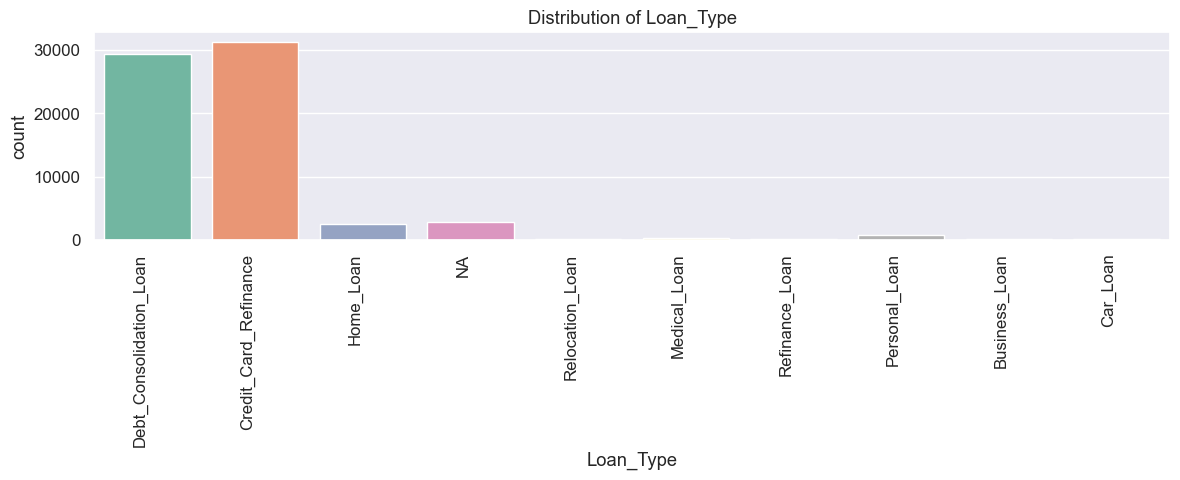

In [11]:
sns.set(style='darkgrid', palette="Set1", font_scale=1.1, rc={"figure.figsize": [12, 5]})
# Select all object dtype columns
cat_cols = train_df.select_dtypes(include='object').columns
for col in cat_cols:
    plt.figure() 
    ax = sns.countplot(data=train_df, x=col, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90, ha='right') 
    plt.tight_layout() 
    plt.show()

In [12]:
# # Create charts for numerical variables 
# numeric_cols = [
#      'Loan Amount', 'Funded Amount', 'Term', 'Delinquency - two years',
#     'Inquires - six months', 'Open Account', 'Public Record', 'Revolving Balance',
#     'Total Accounts', 'Collection 12 months Medical', 'Last week Pay', 'Accounts Delinquent',
#     'Total Collection Amount', 'Total Current Balance', 'Total Revolving Credit Limit',
#     'Loan Status', 'Funded Amount Investor', 'Interest Rate', 'Home Ownership',
#     'Debit to Income', 'Revolving Utilities', 'Total Received Interest',
#     'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee'
# ]

# # Loop over each numeric column add 1 and remove NA for log issues
# for col in numeric_cols:
#     x1 = train_df[col].dropna()  
#     try:
#         x2 = np.log2(x1 + 1) 
#     except Exception as e:
#         print(f"Skipping {col} due to error in log transformation: {e}")
#         continue

#     _, ax = plt.subplots(1, 4, figsize=(25, 5))
#     sns.boxplot(x=x1, ax=ax[0])
#     sns.histplot(x=x1, ax=ax[1], kde=True)
#     sns.boxplot(x=x2, ax=ax[2])
#     sns.histplot(x=x2, ax=ax[3], kde=True)

#     ax[0].set_title(f"Boxplot - {col}", fontweight='bold')
#     ax[1].set_title(f"Histplot - {col}", fontweight='bold')
#     ax[2].set_title(f"Boxplot - Log({col})", fontweight='bold')
#     ax[3].set_title(f"Histplot - Log({col})", fontweight='bold')
    
#     plt.tight_layout()
#     plt.show()


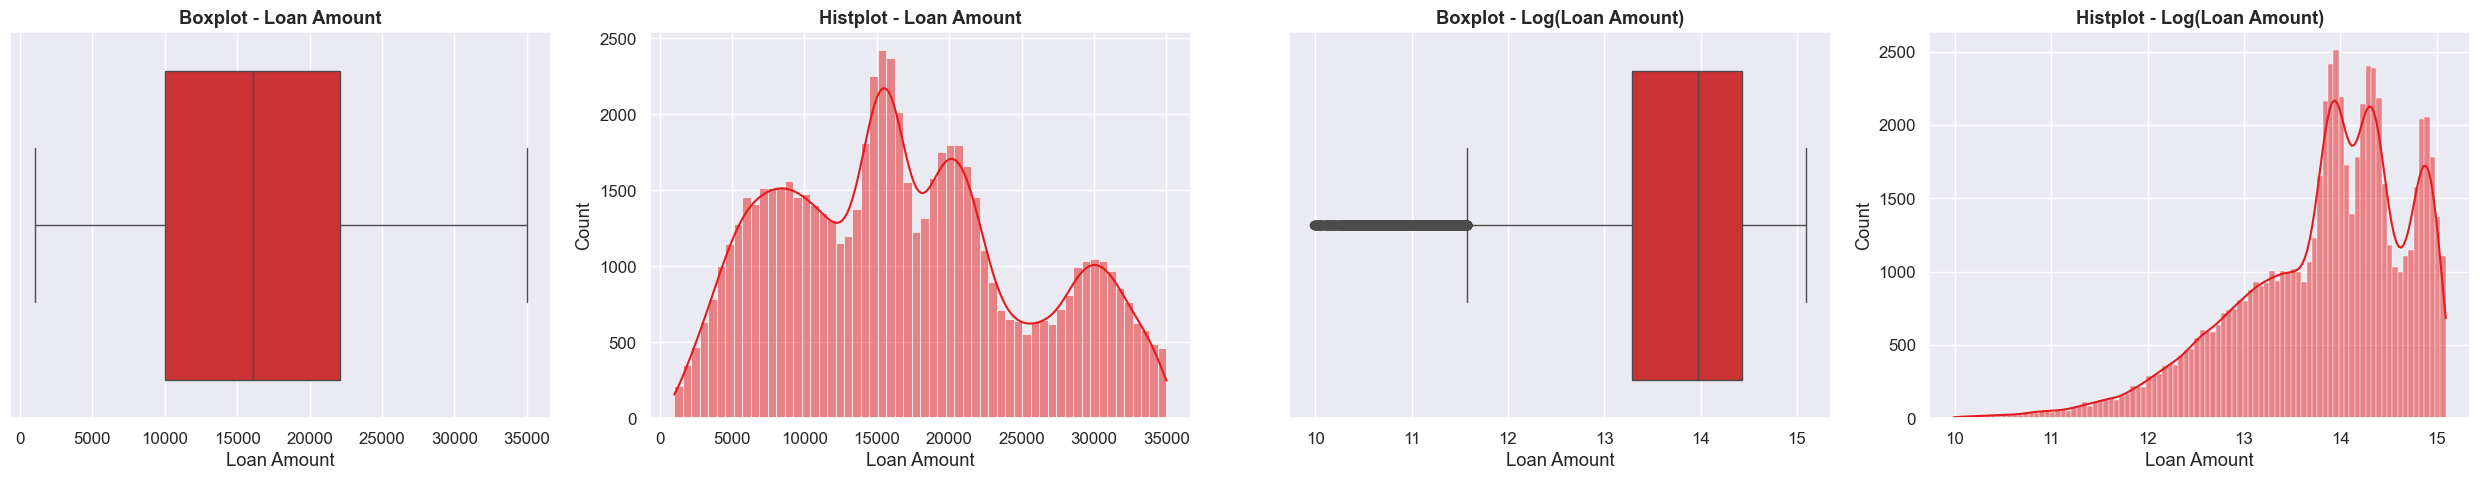

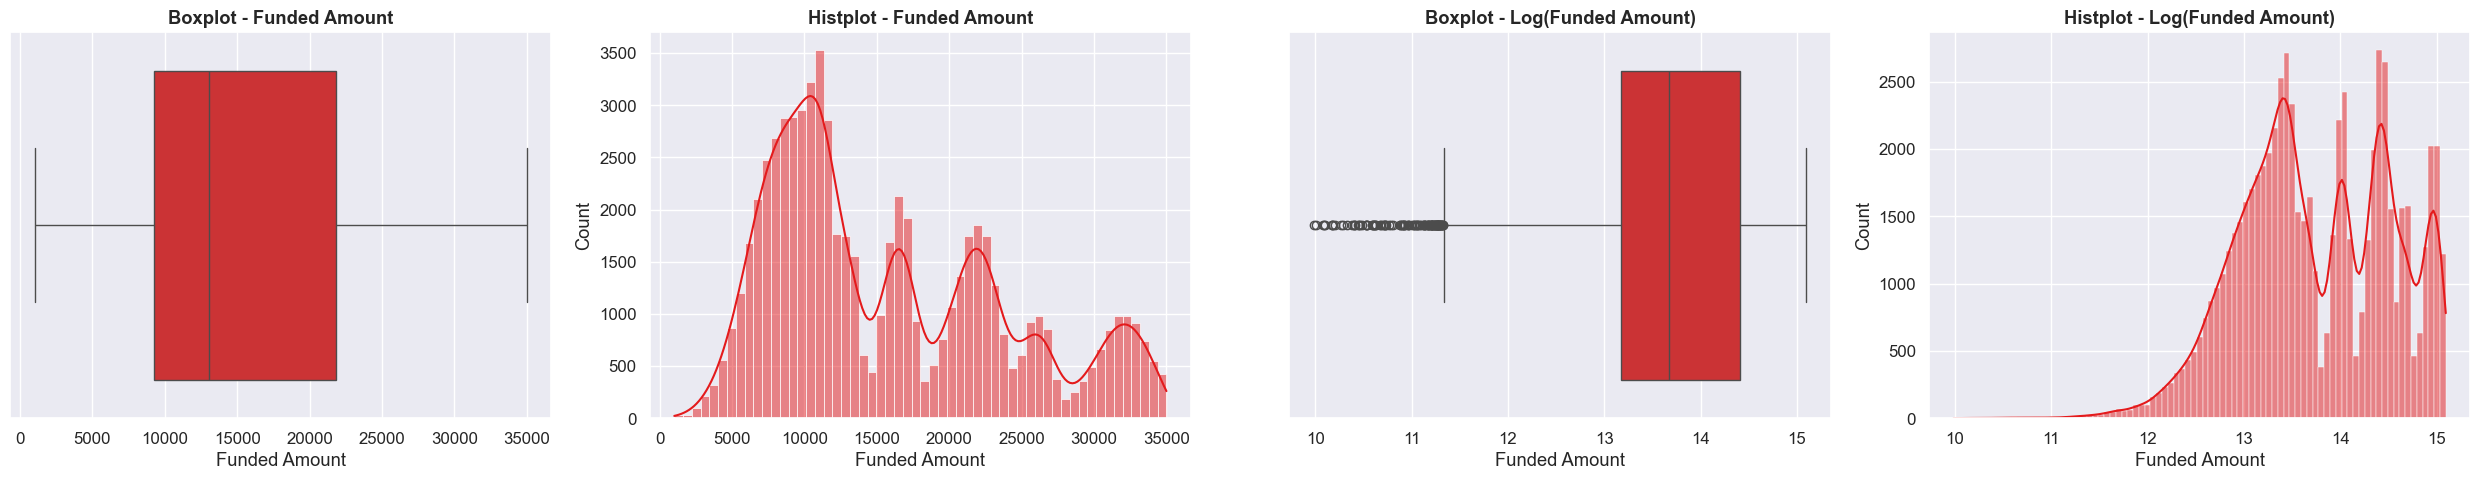

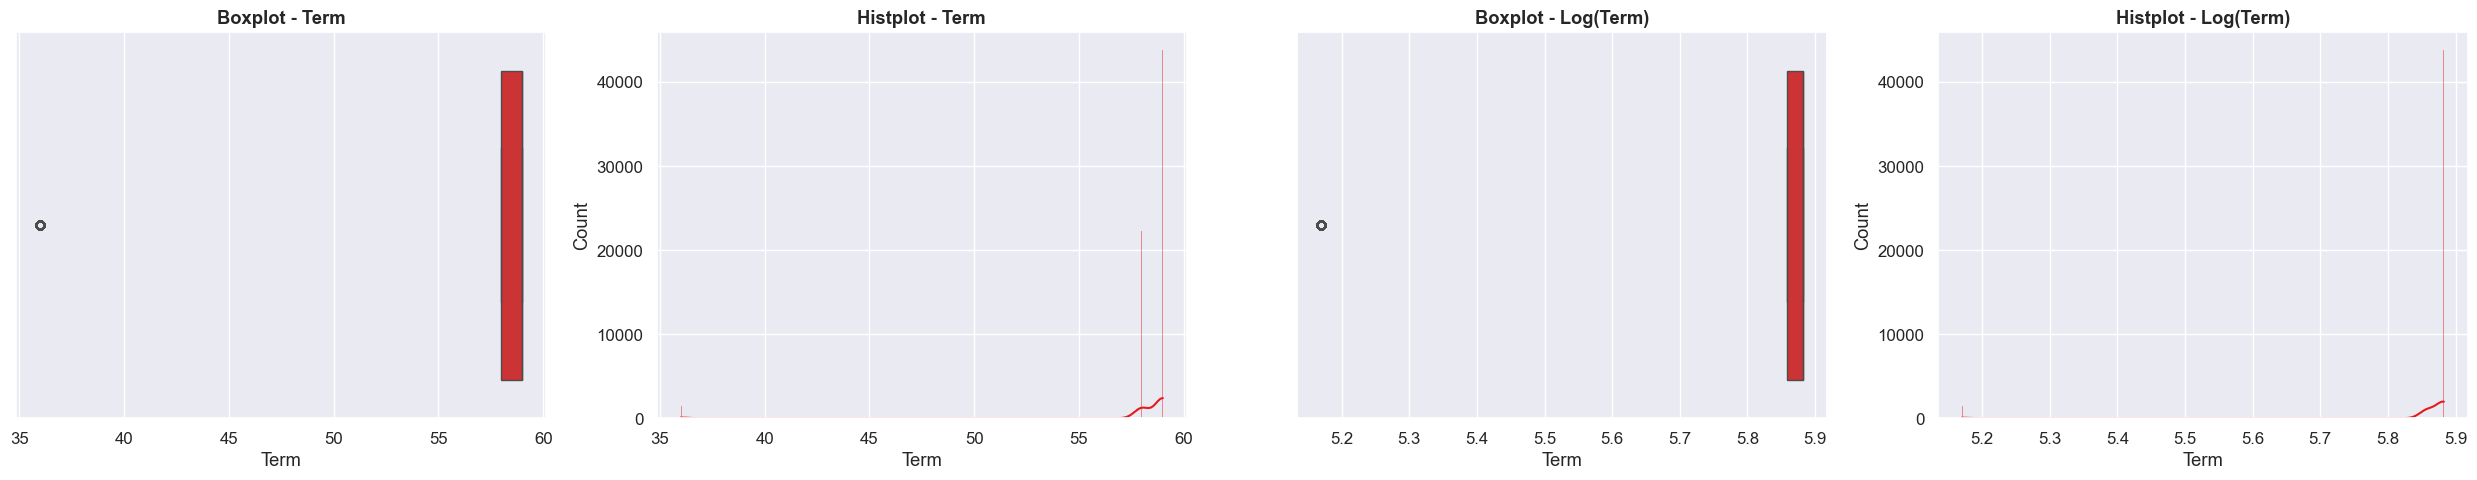

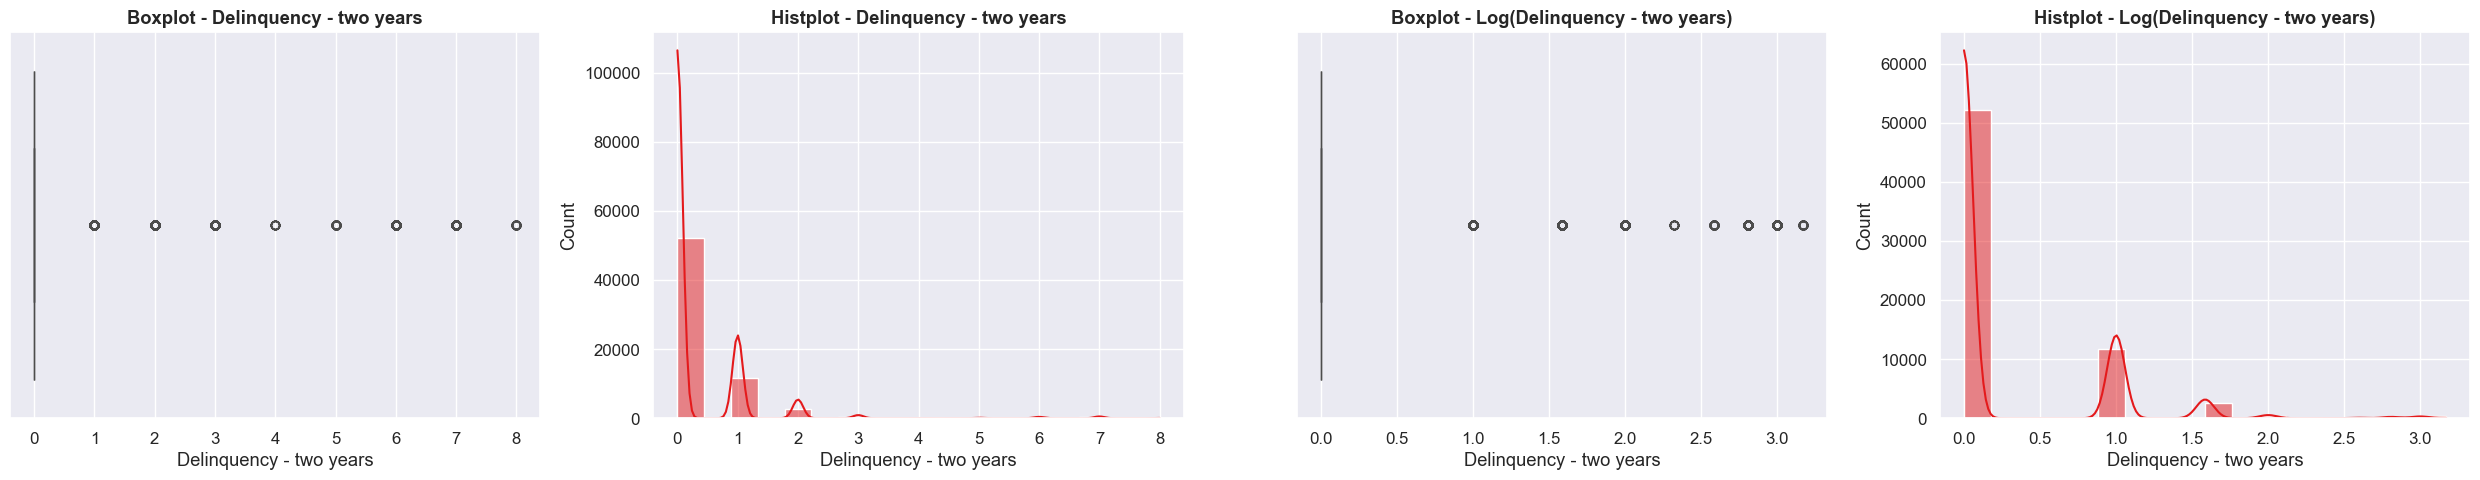

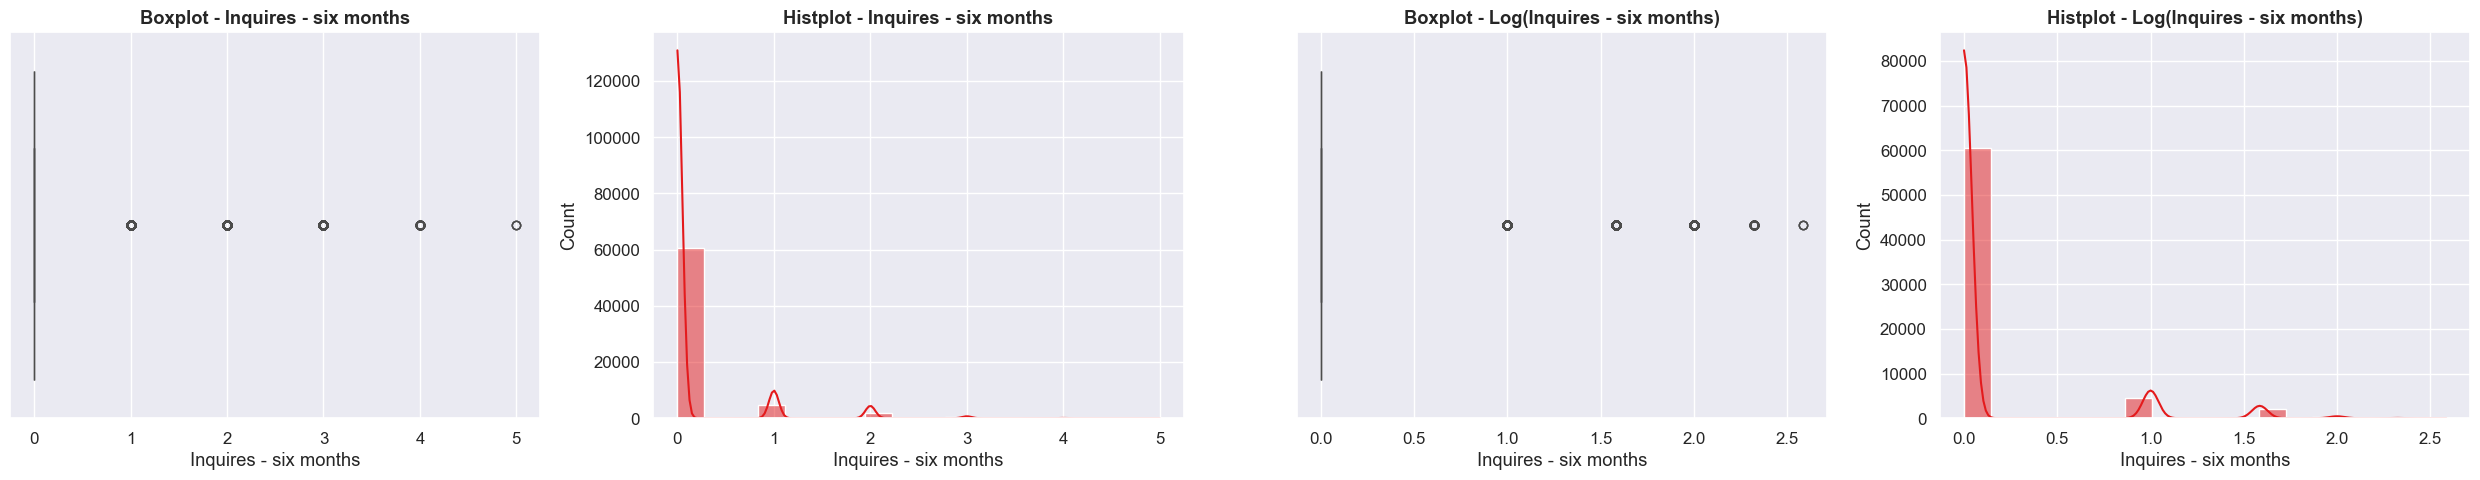

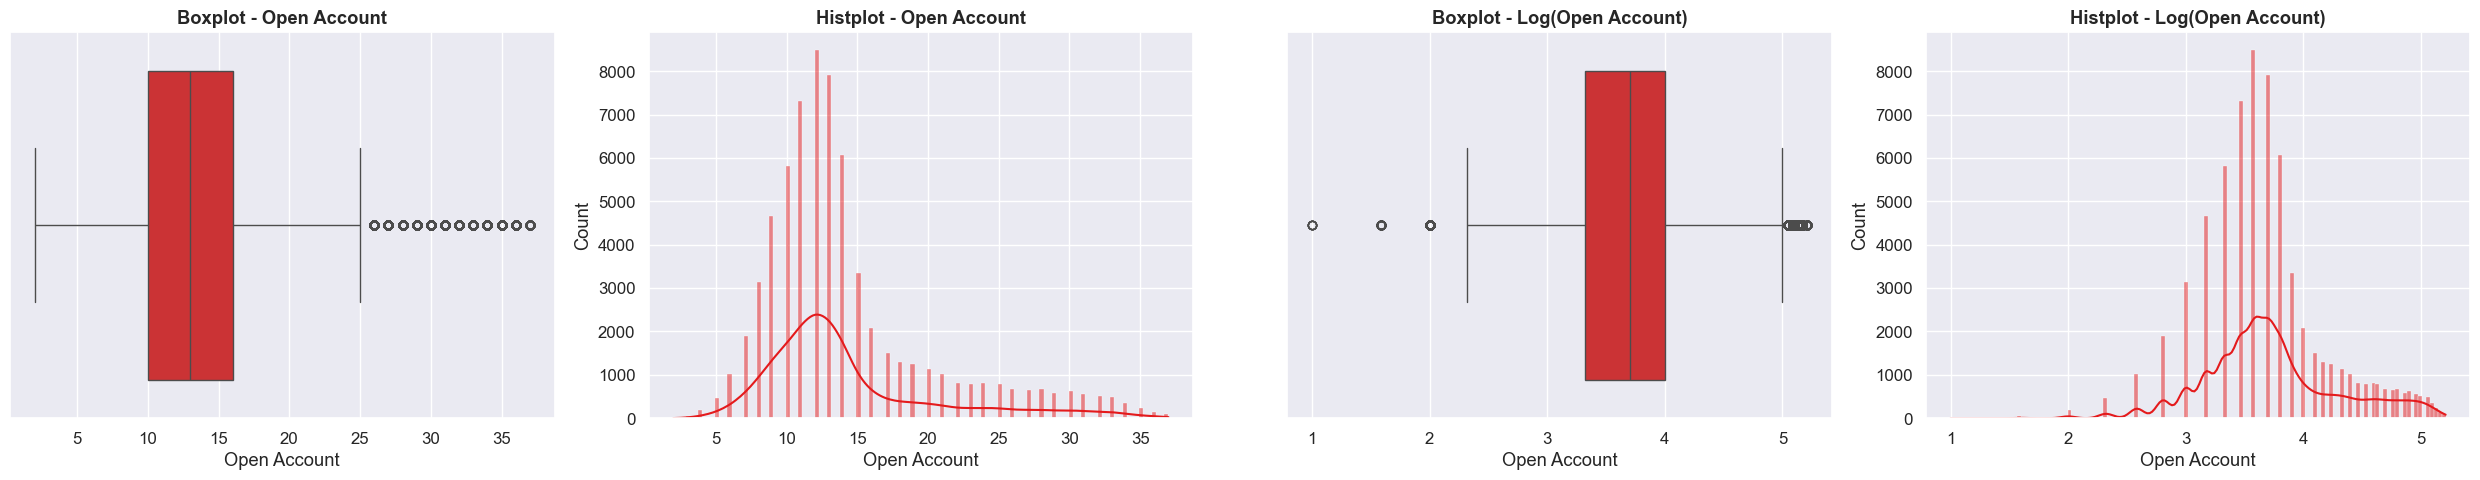

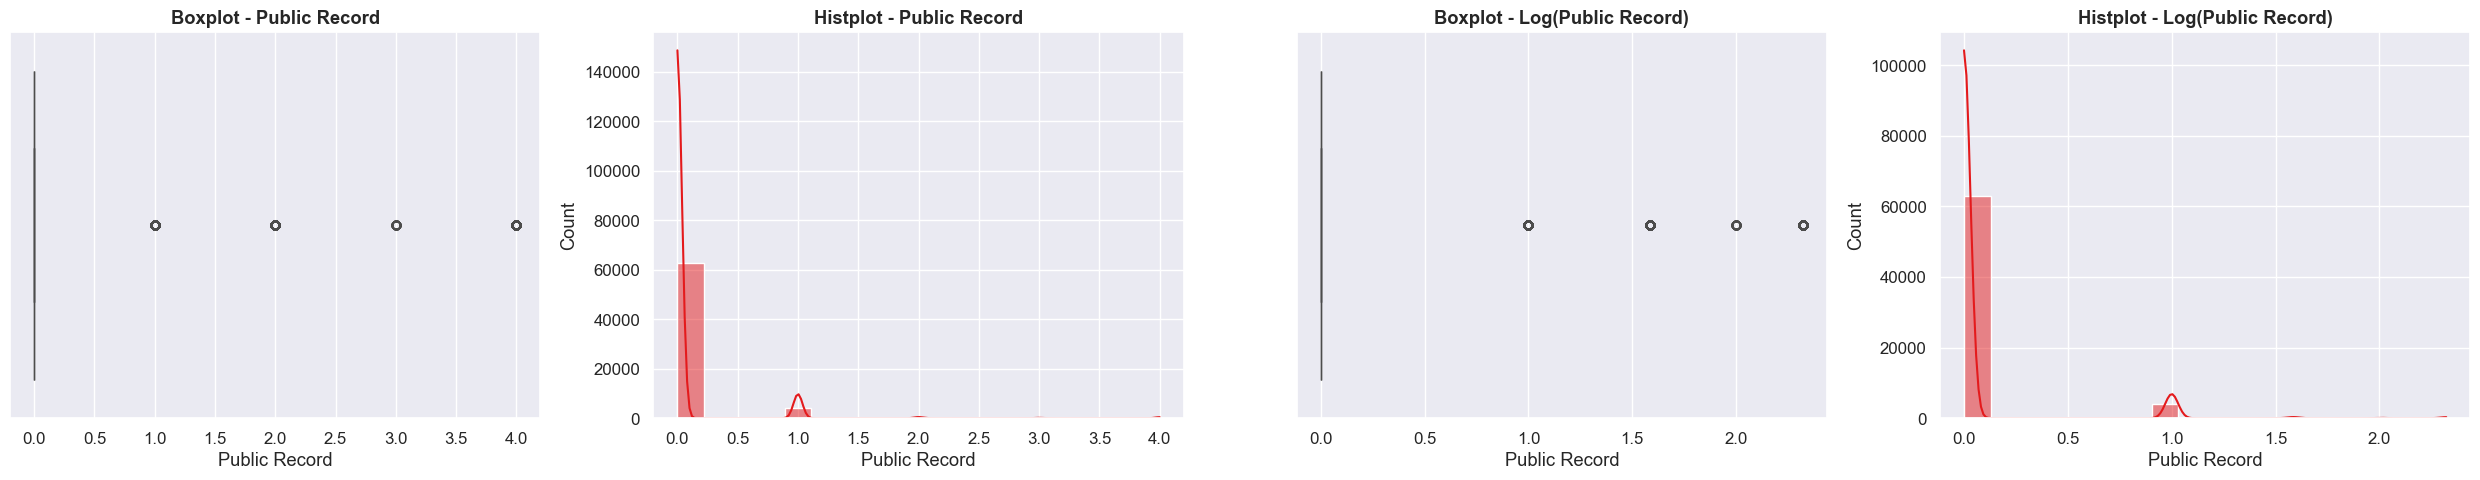

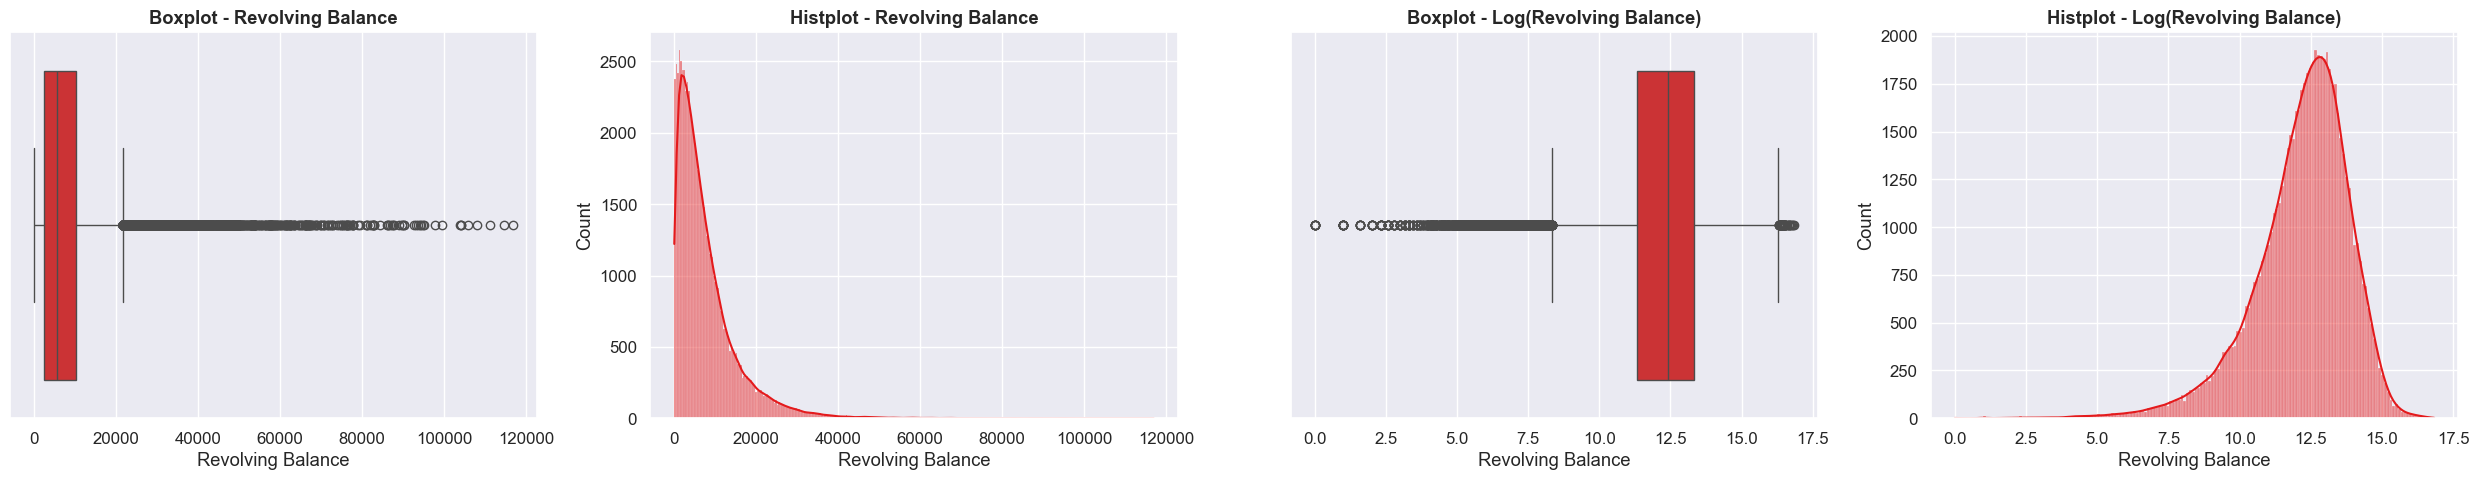

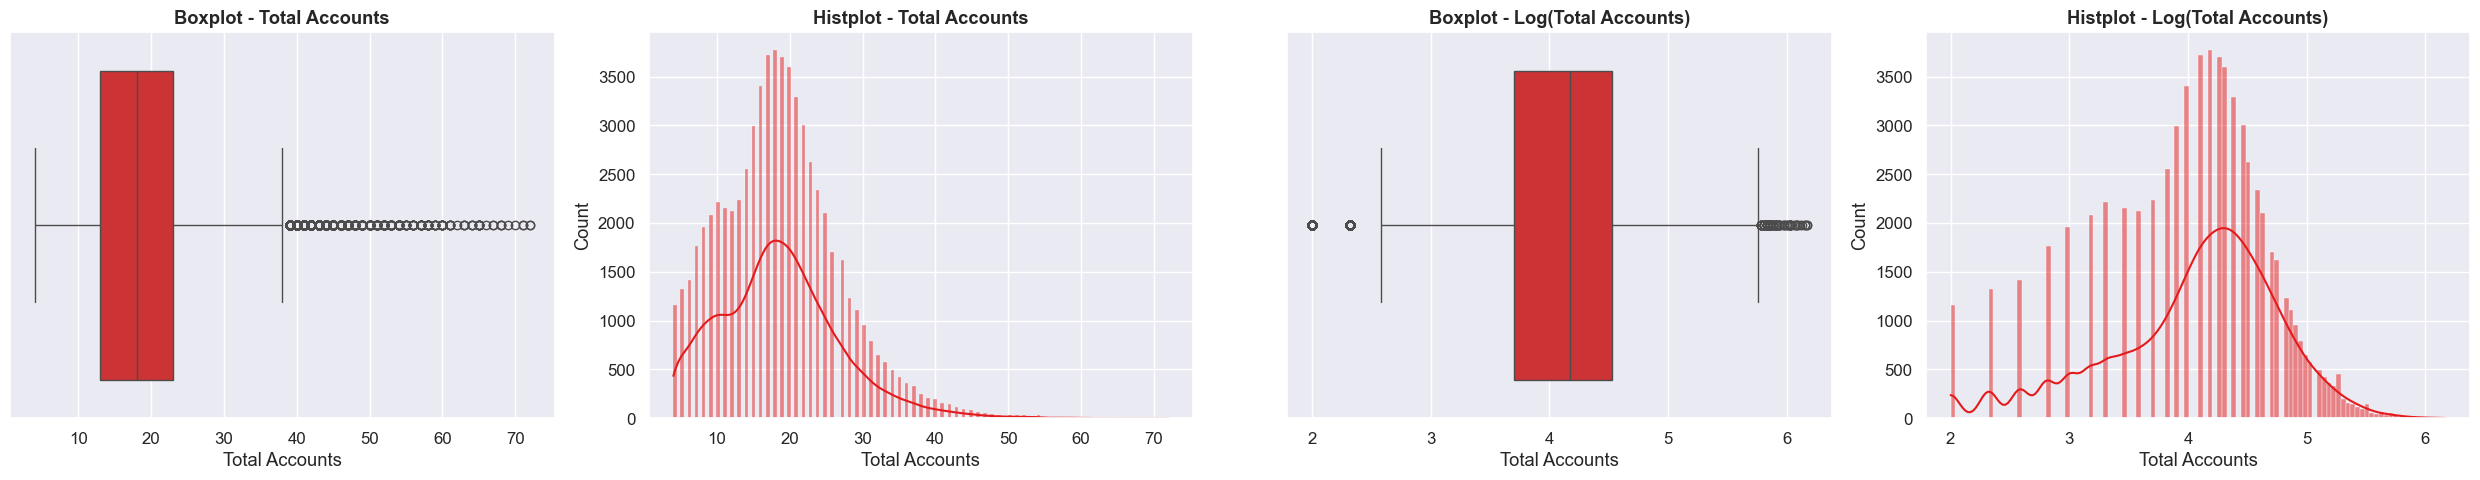

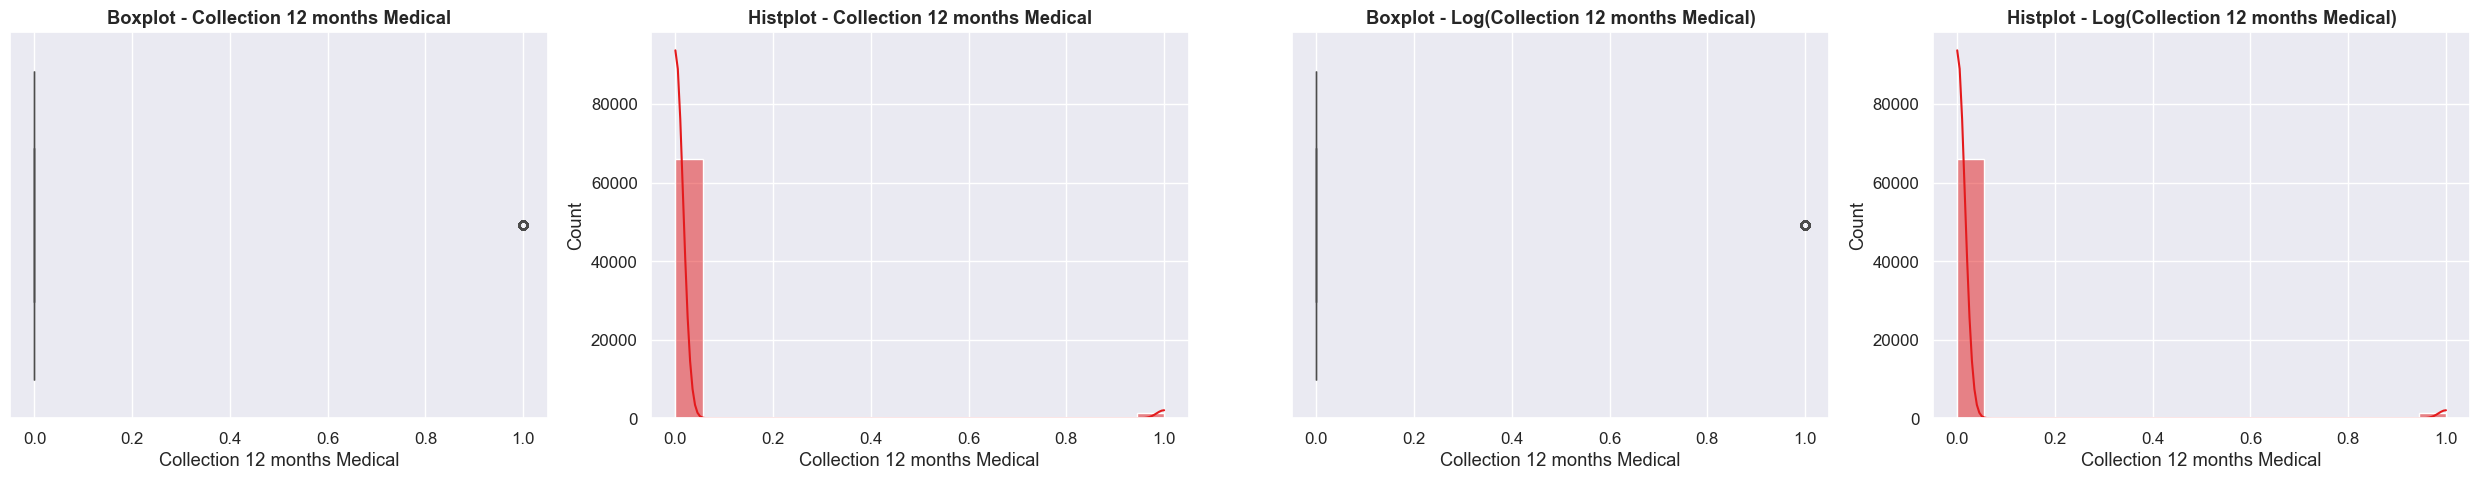

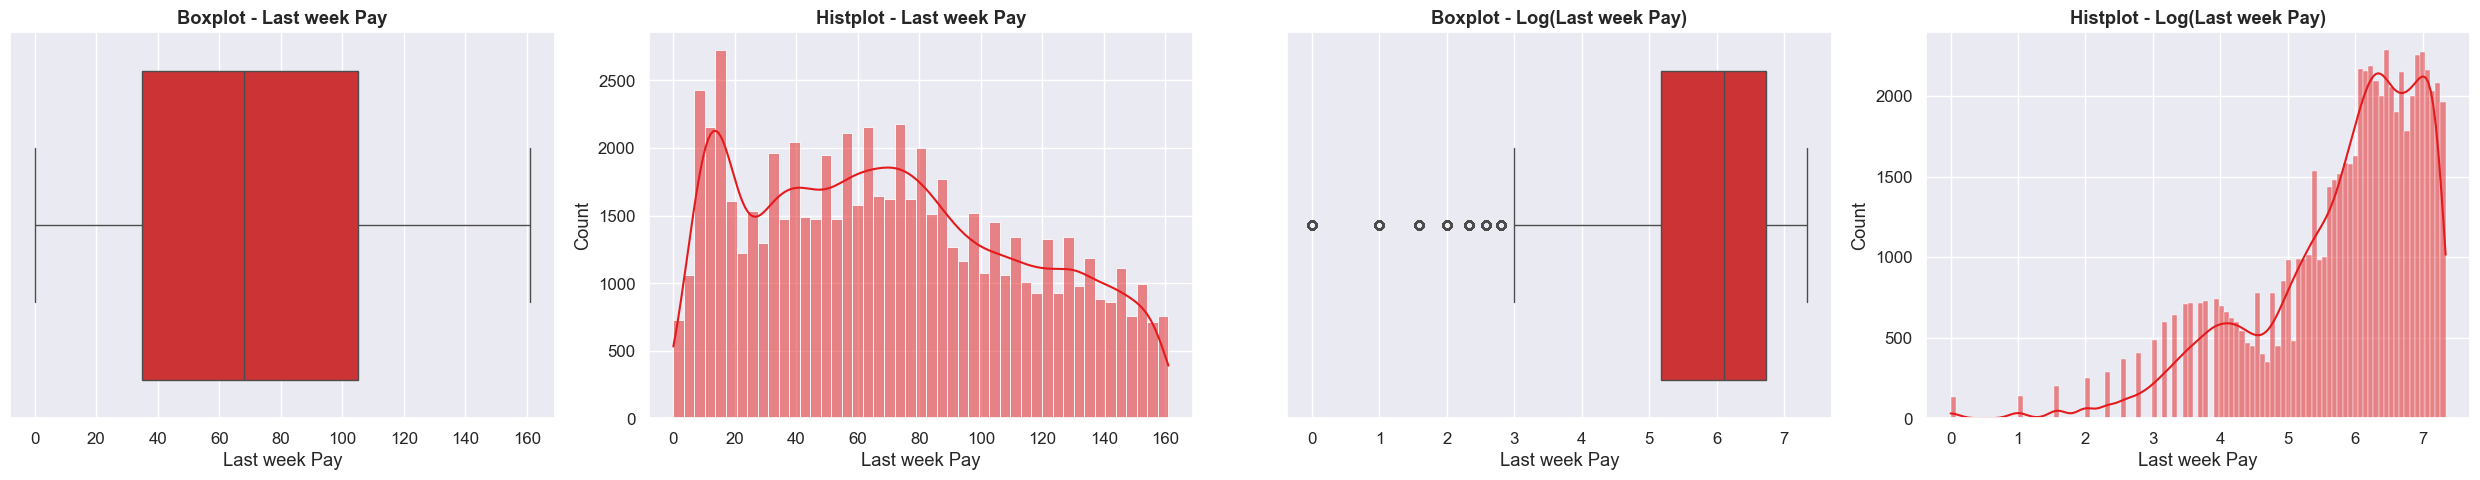

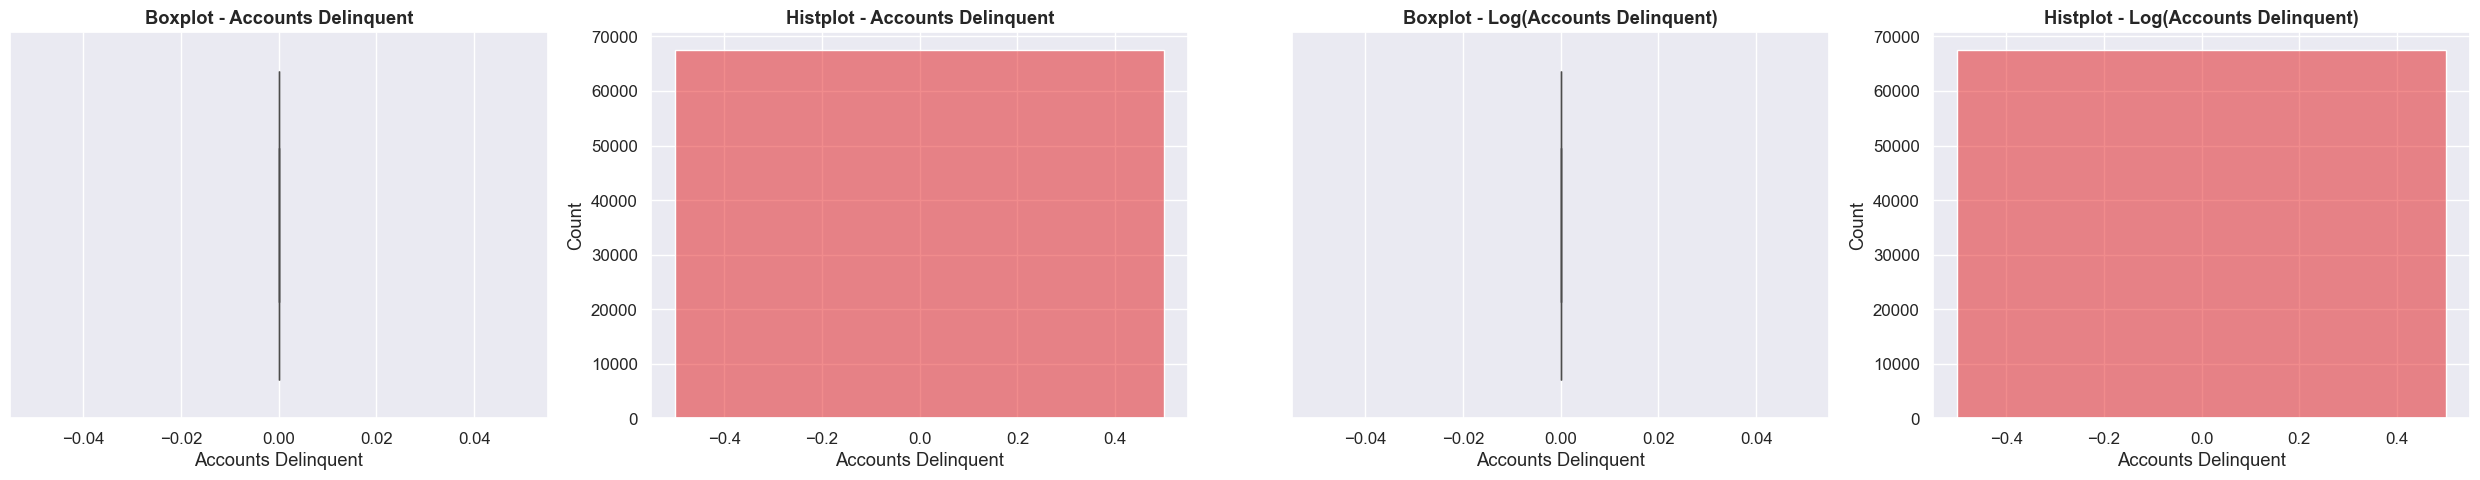

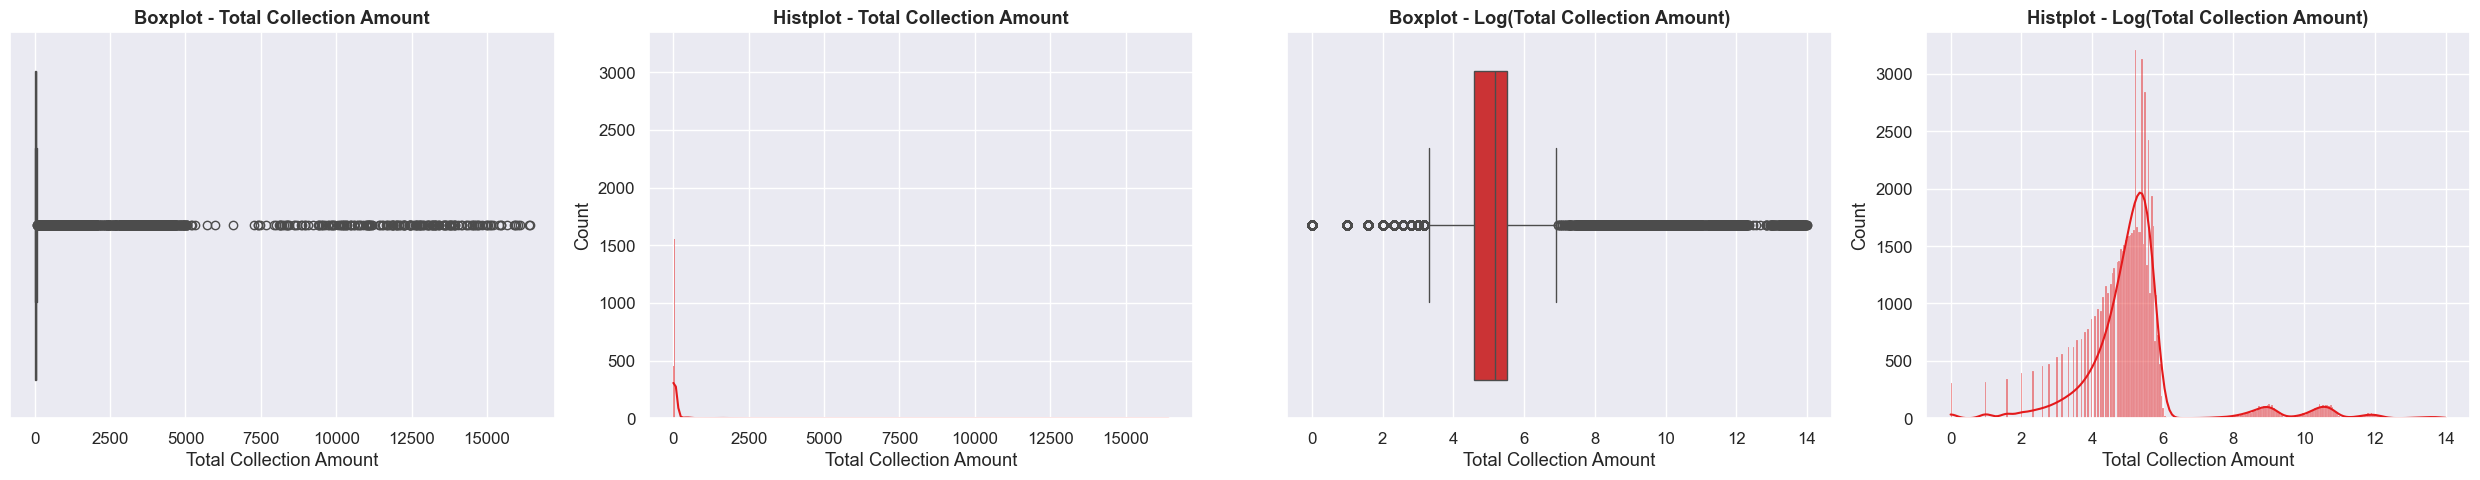

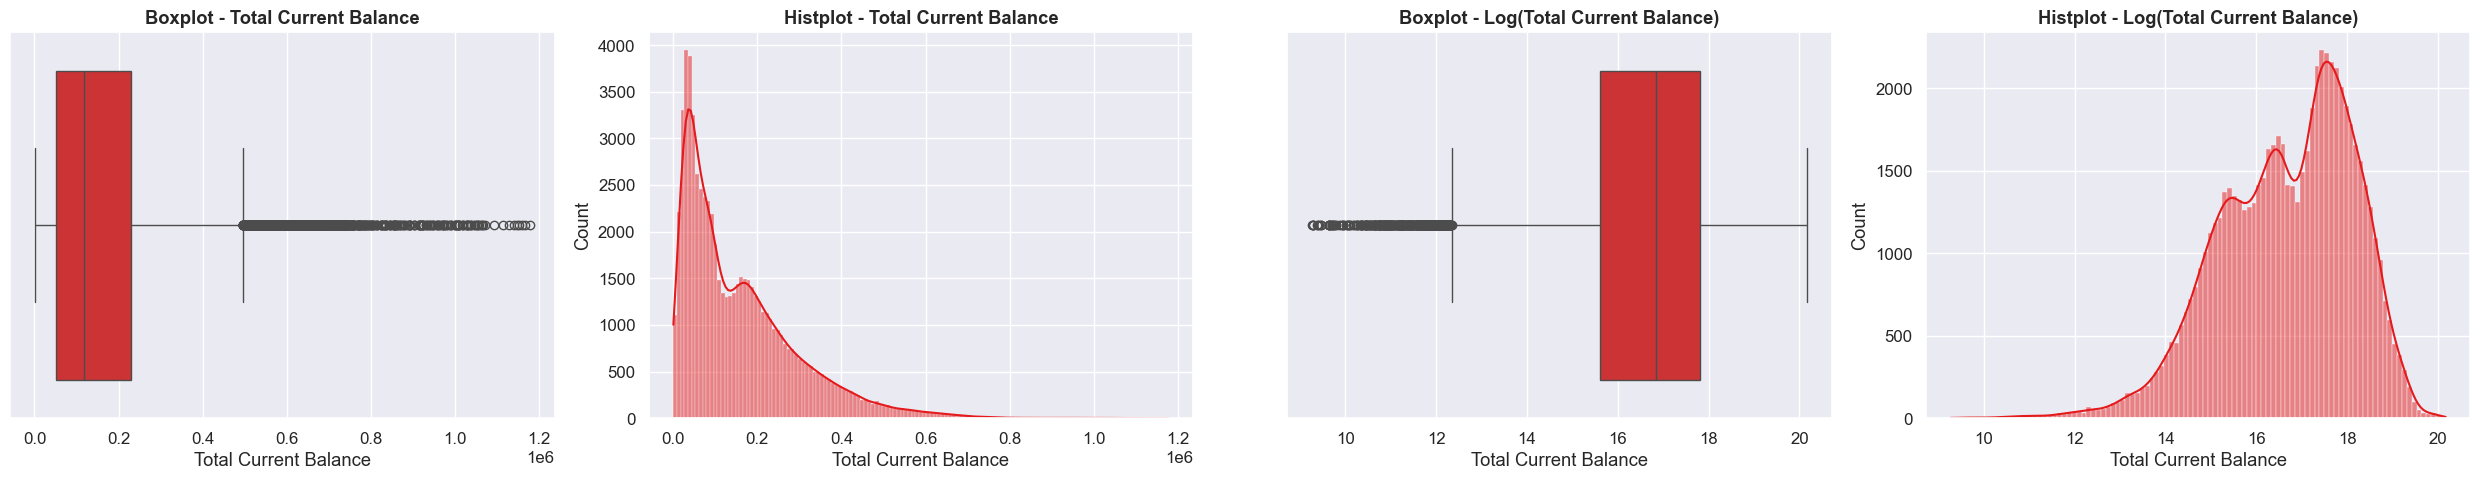

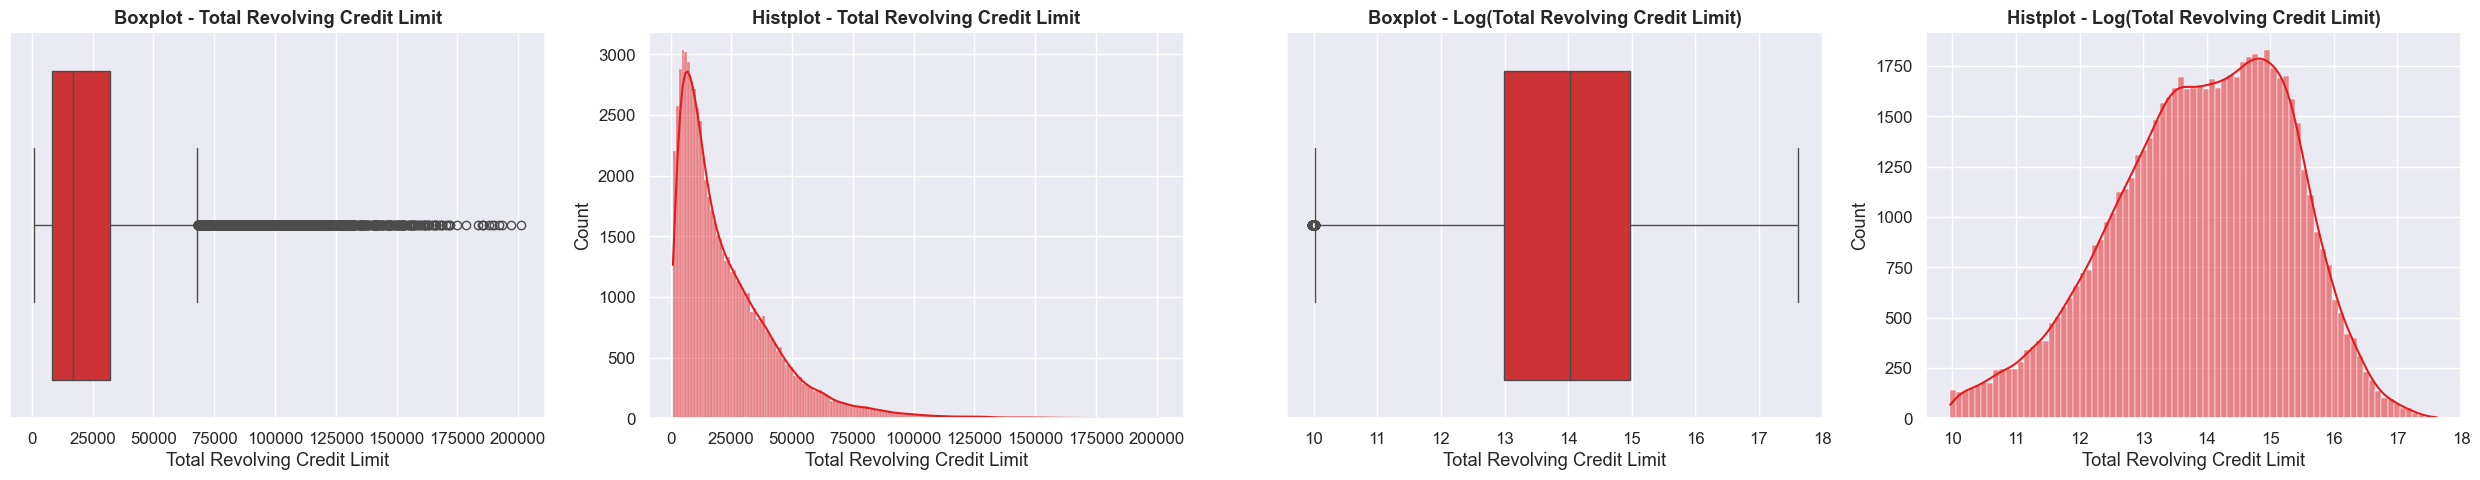

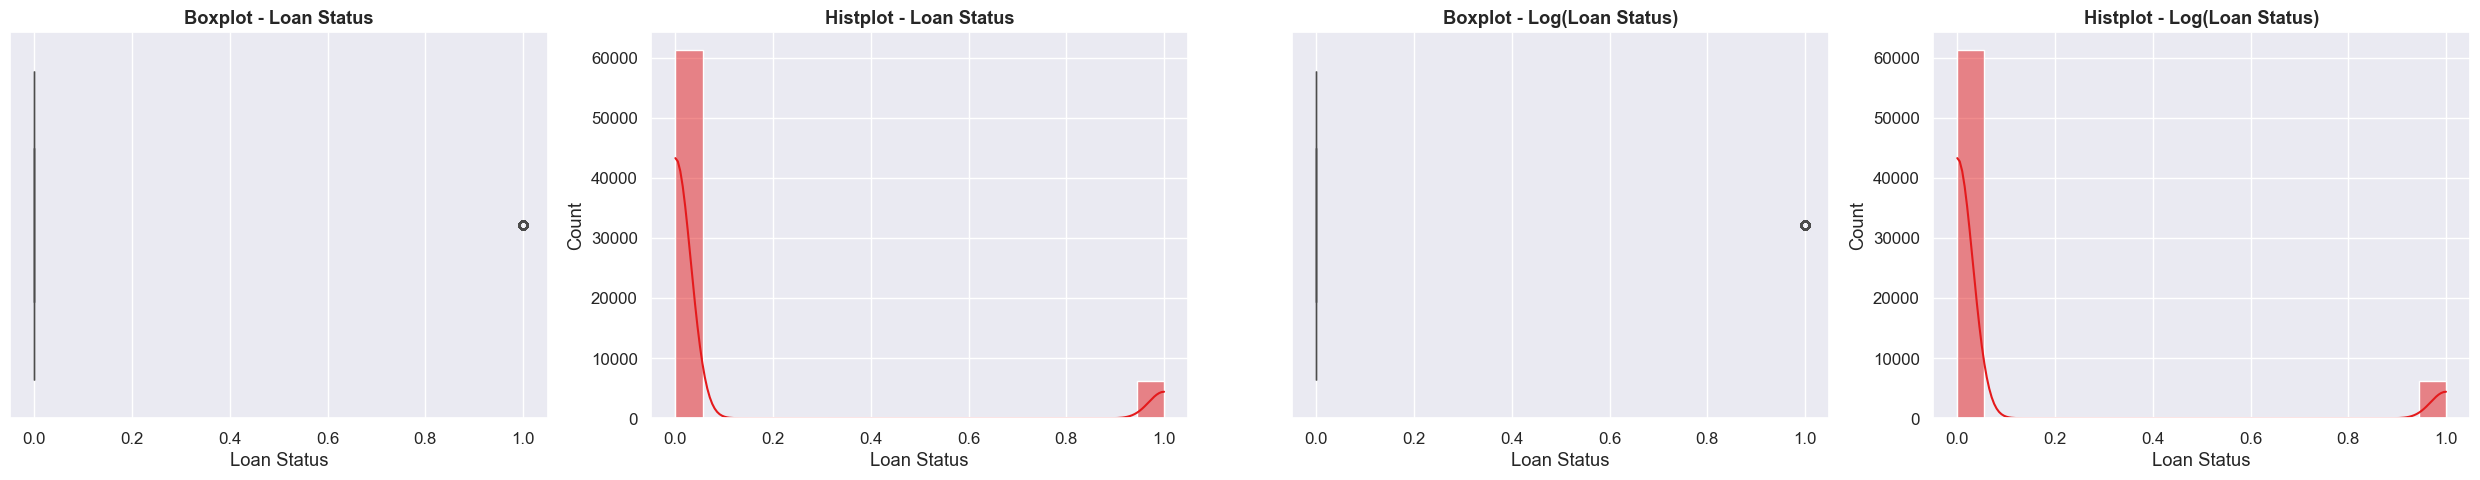

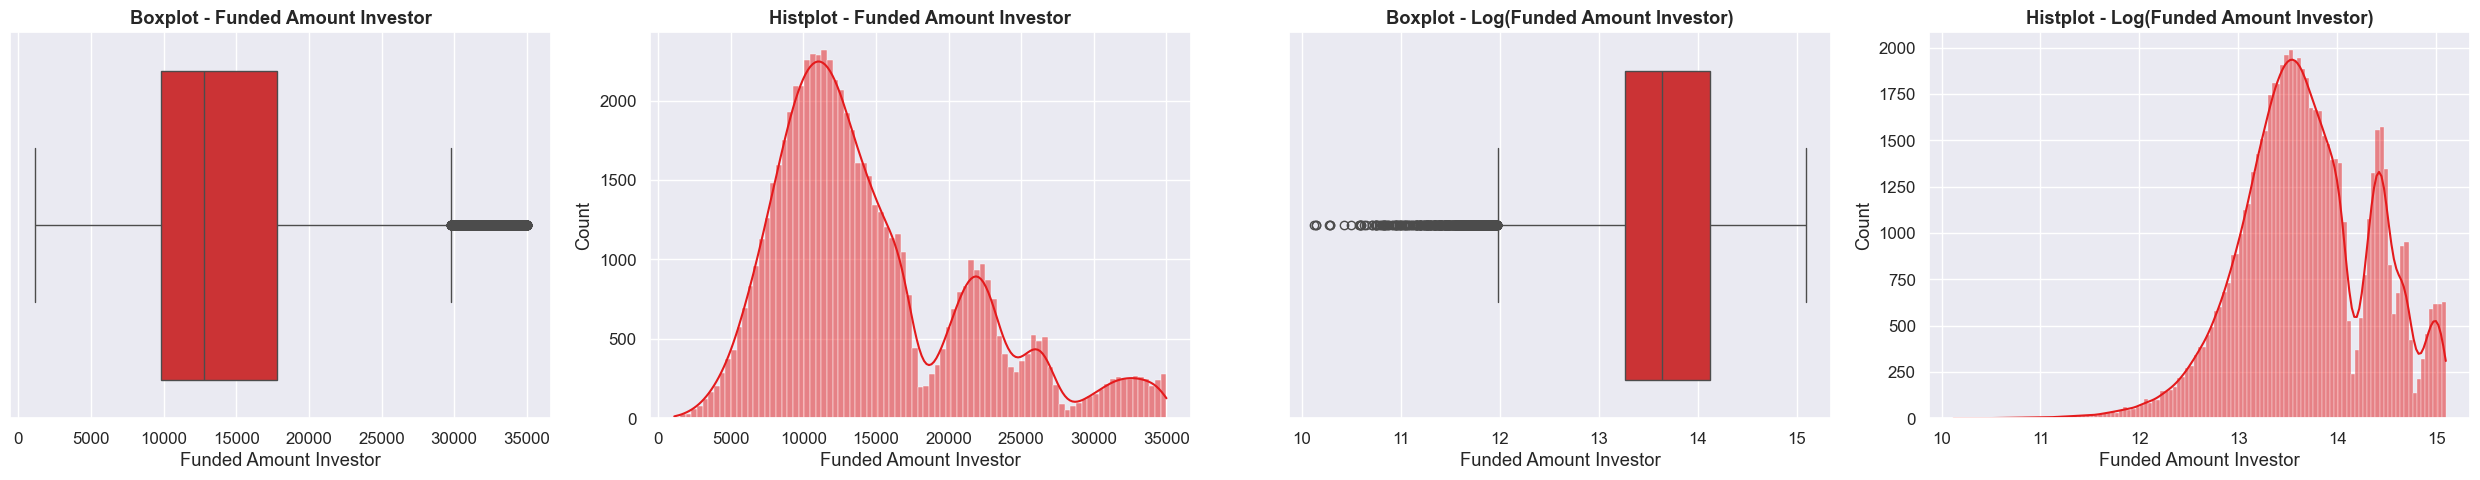

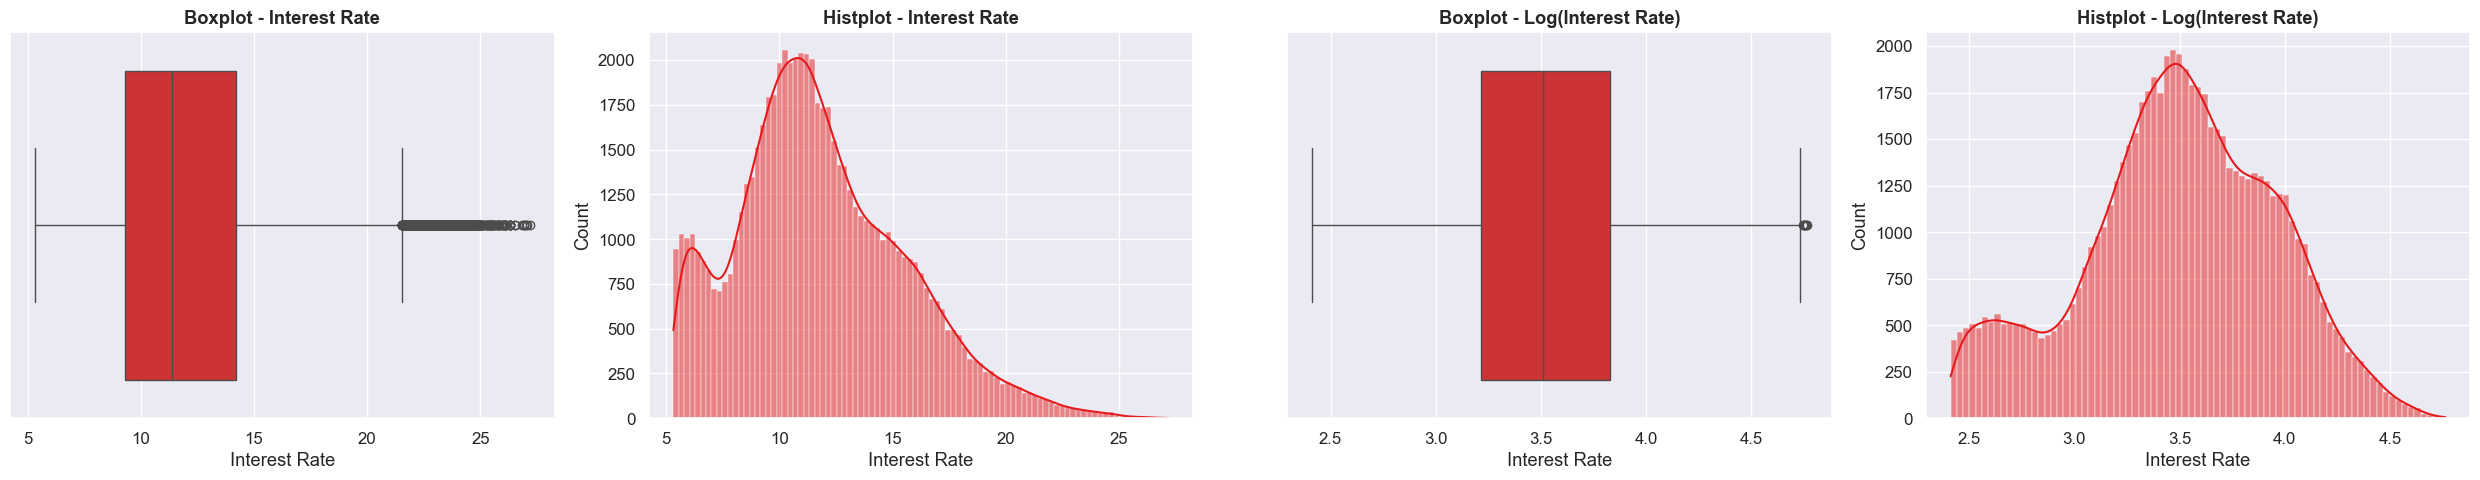

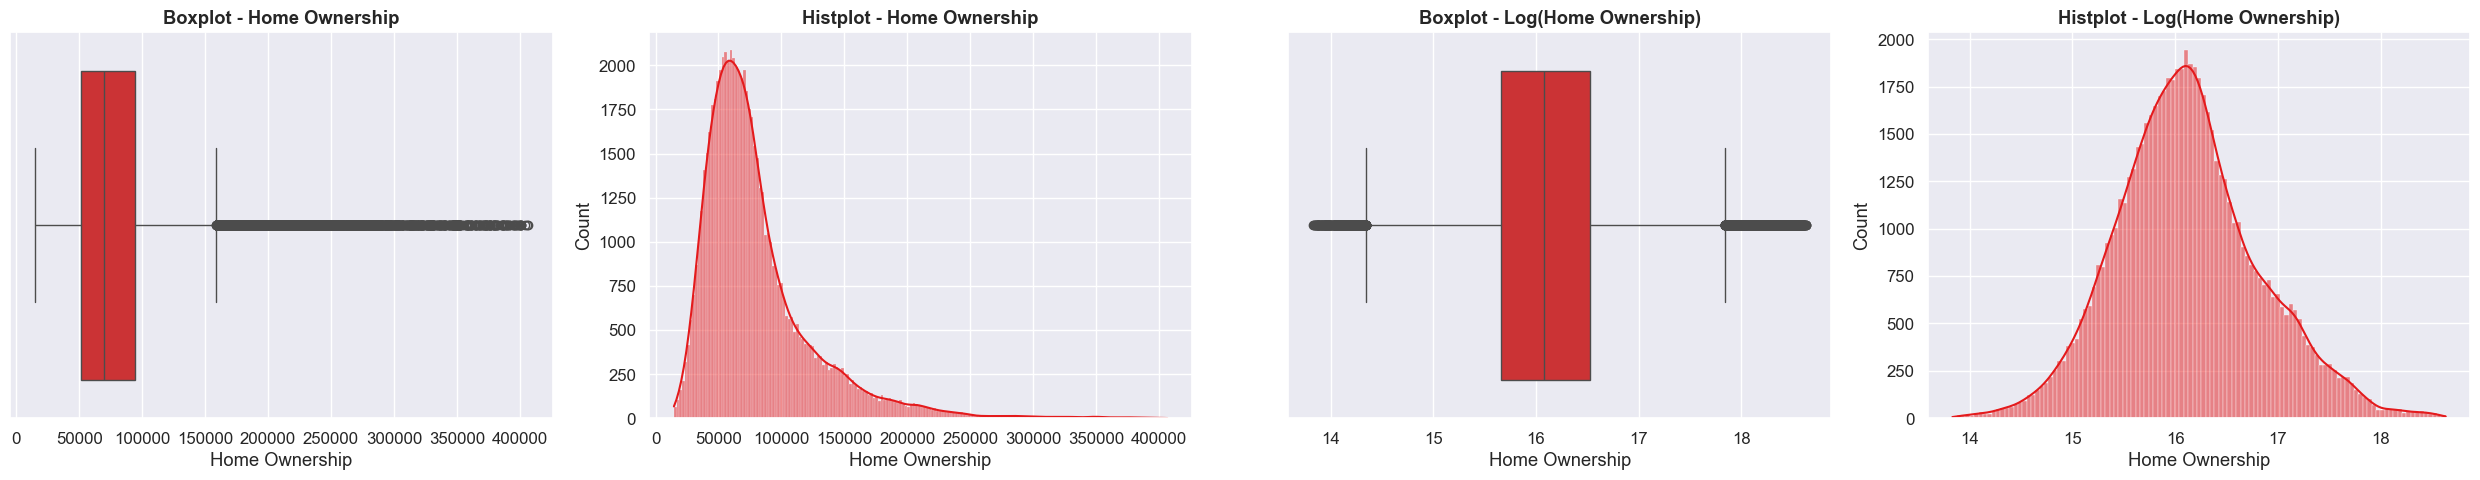

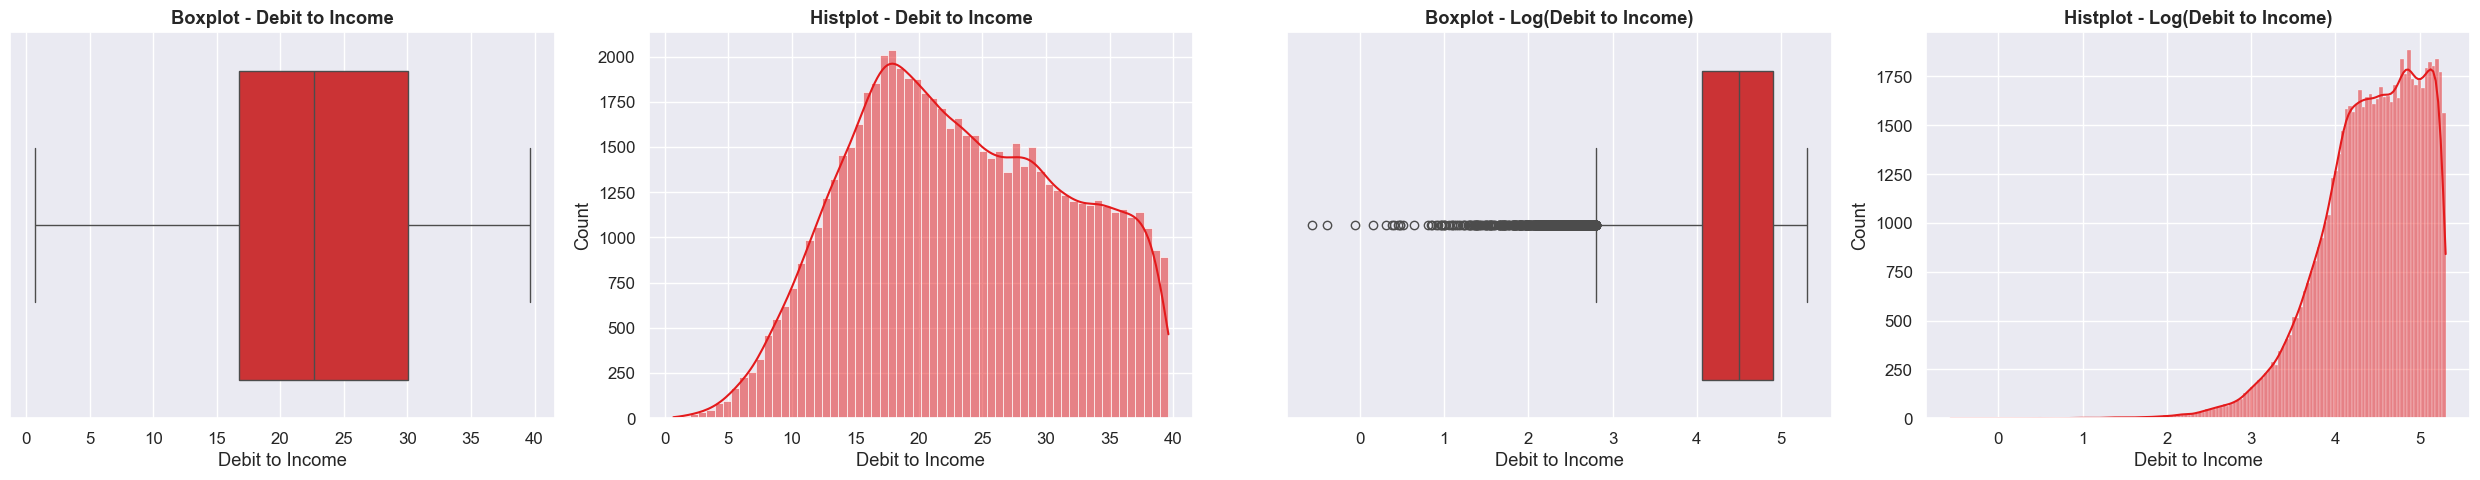

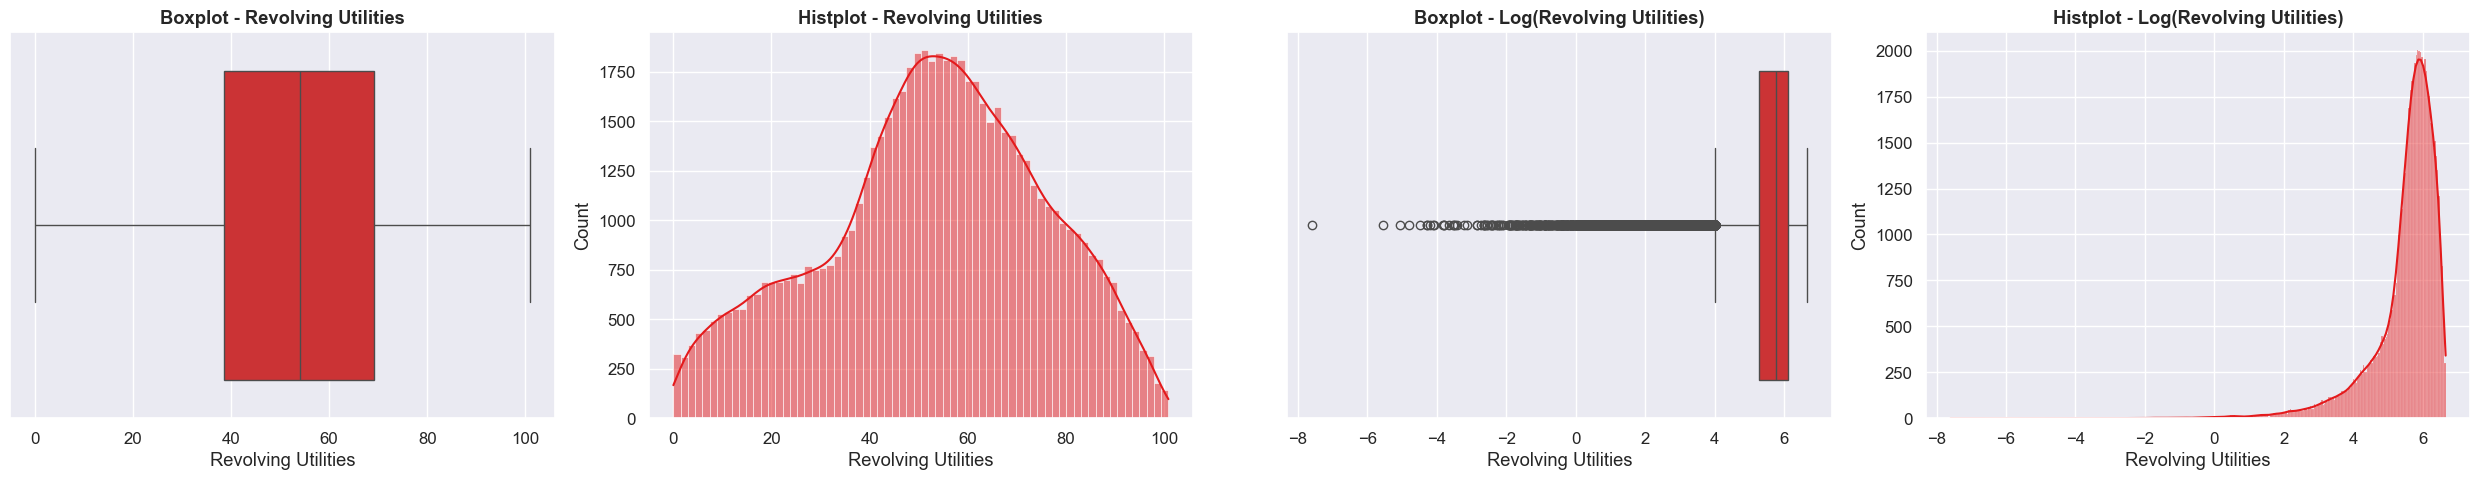

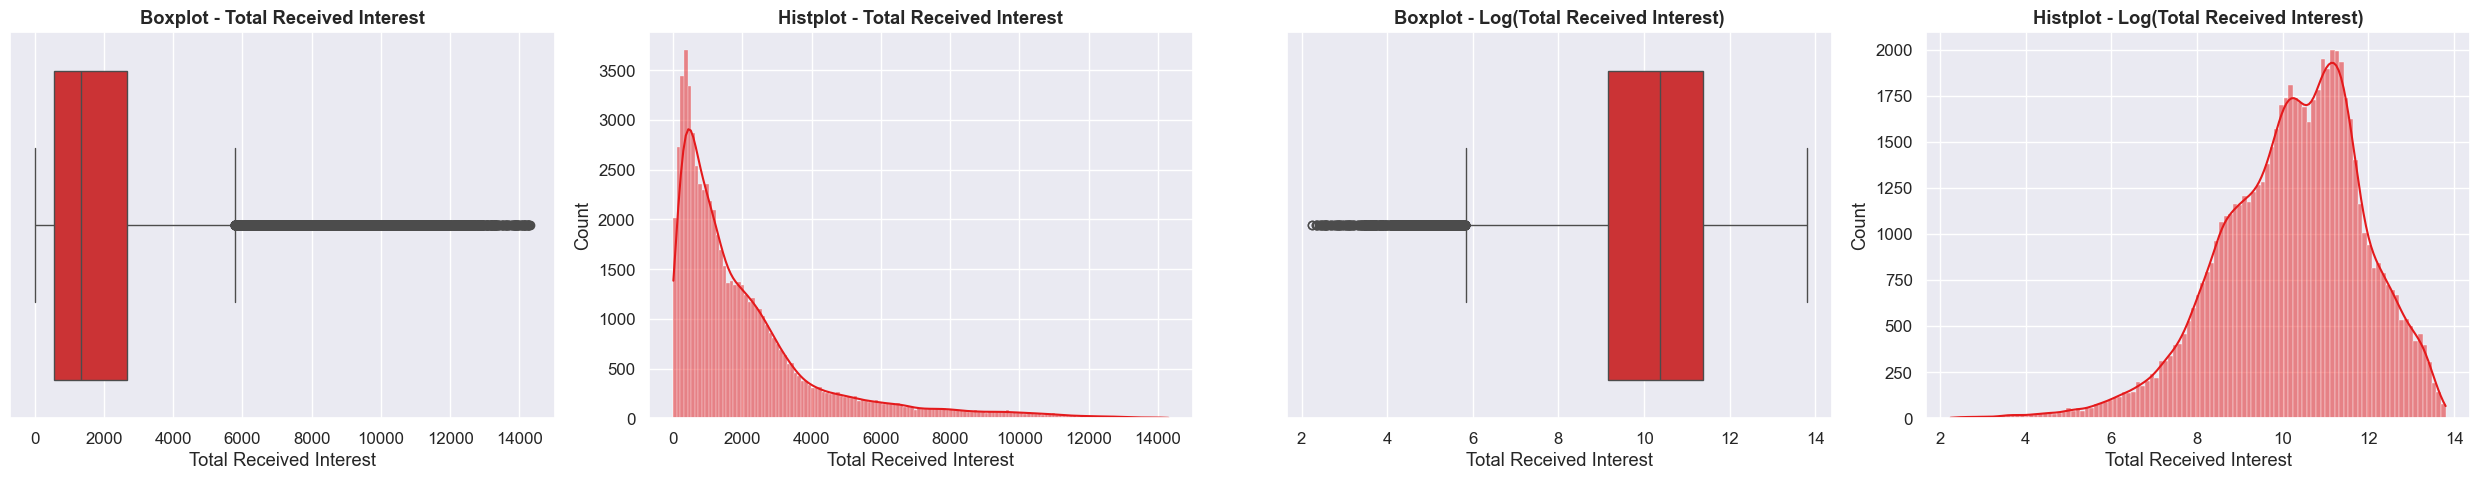

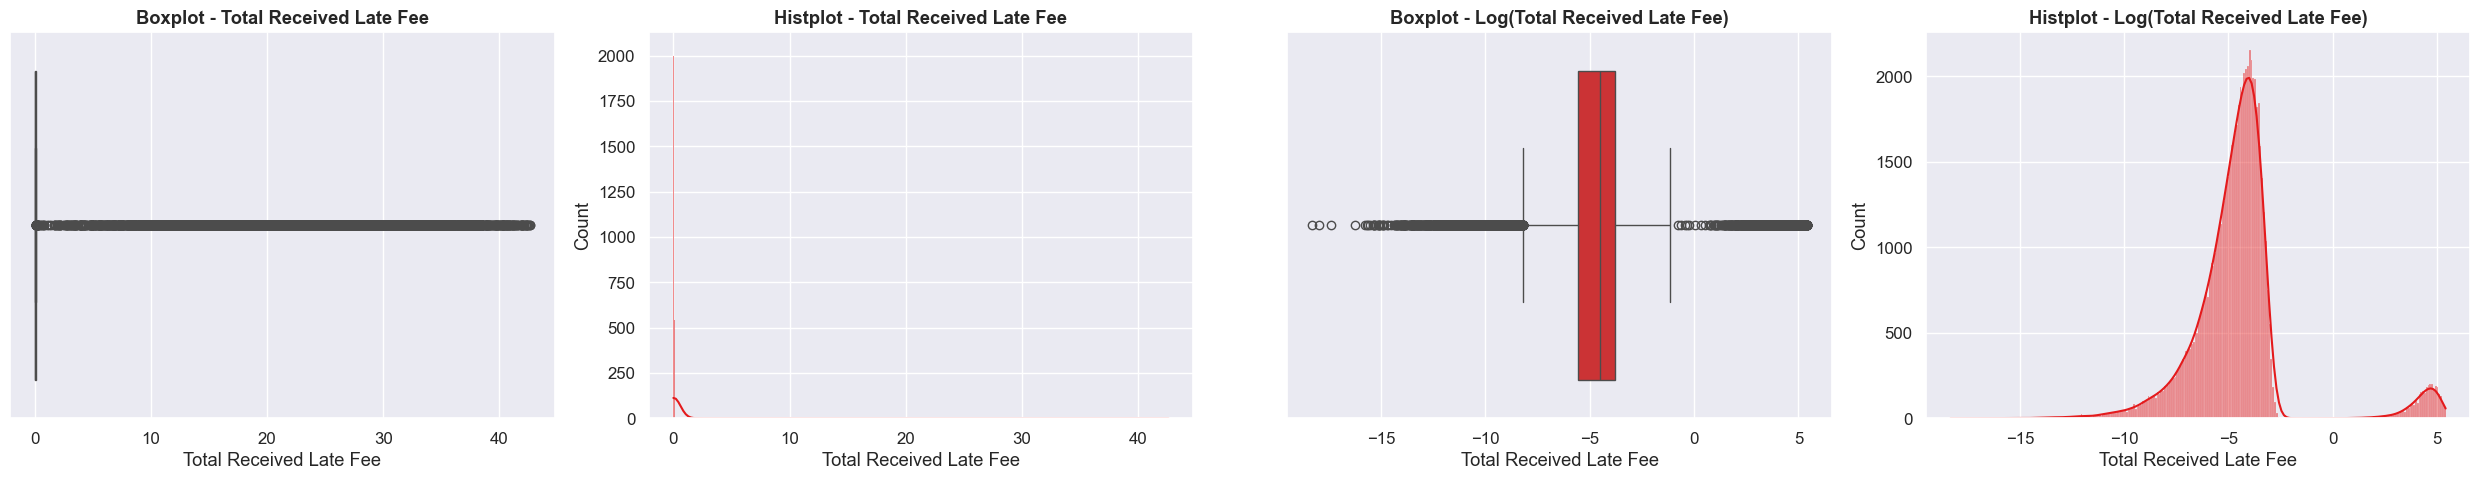

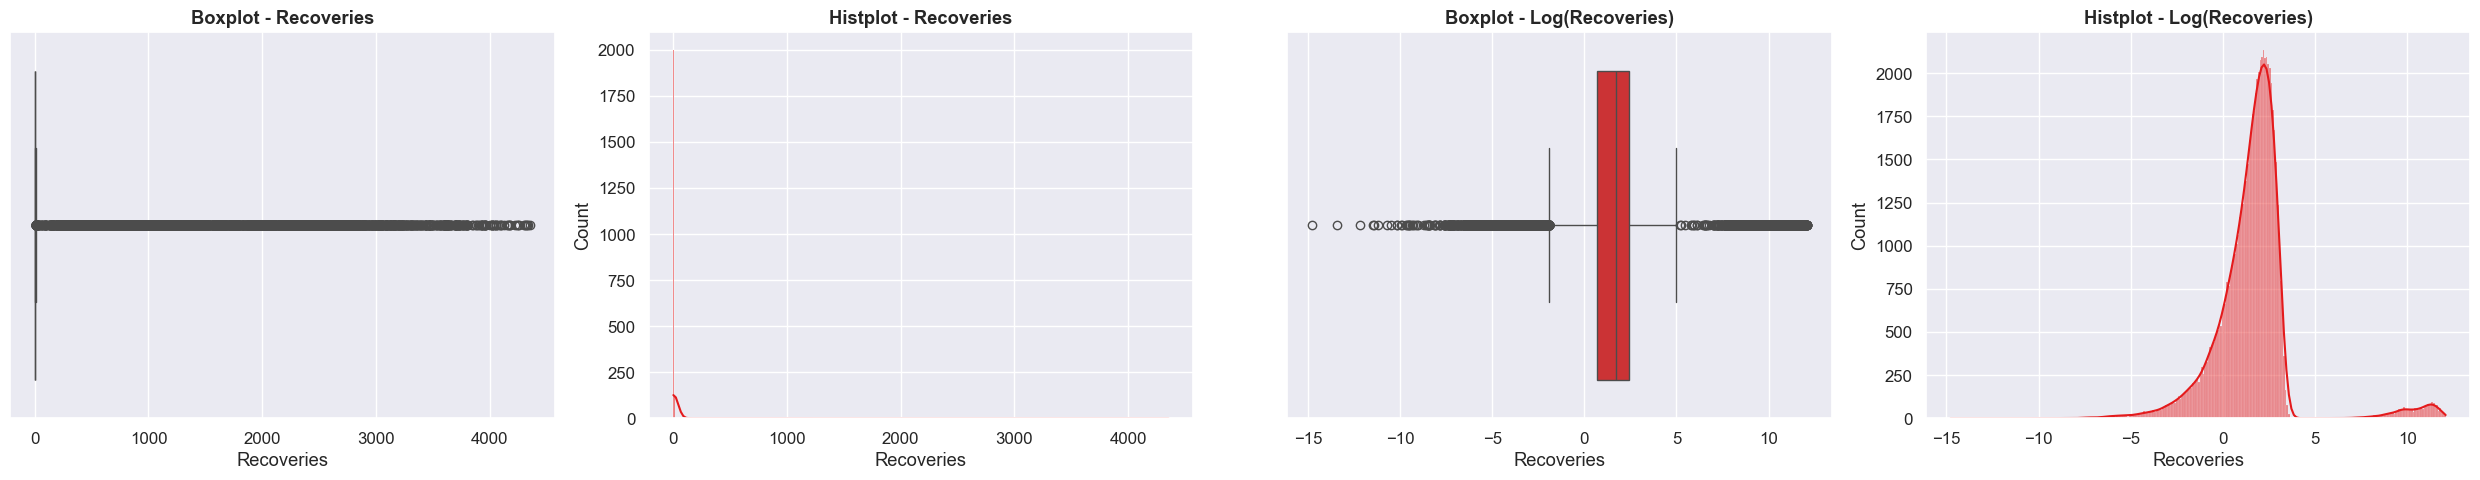

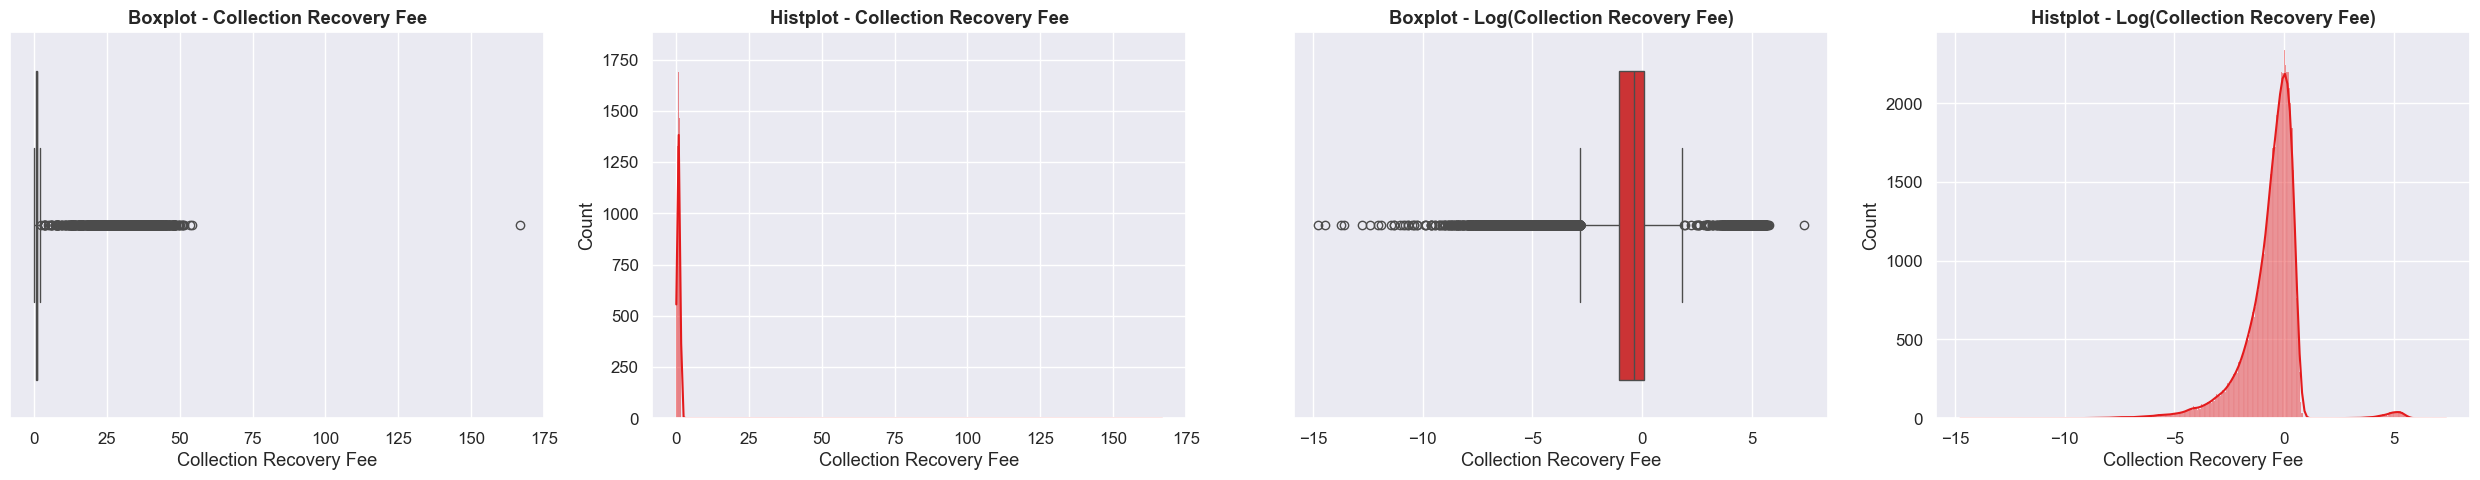

In [13]:
# Step 1: Get numeric columns automatically
numeric_cols = []
for dtype, cols in train_df.dtypes.groupby(train_df.dtypes).groups.items():
    if dtype in ['int64', 'float64']:
        numeric_cols.extend(cols)

# Step 2: Exclude identifier columns
exclude_cols = ['ID']
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]
# Step 3: Visualize each numeric column
for col in numeric_cols:
    x1 = train_df[col].dropna()
    # Safe log transformation
    if (x1 <= 0).any():
        x2 = np.log2(x1 + 1)  # Avoid log(0) or negative
    else:
        x2 = np.log2(x1)
    _, ax = plt.subplots(1, 4, figsize=(25, 5))
    sns.boxplot(x=x1, ax=ax[0])
    sns.histplot(x=x1, ax=ax[1], kde=True)
    sns.boxplot(x=x2, ax=ax[2])
    sns.histplot(x=x2, ax=ax[3], kde=True)
    ax[0].set_title(f"Boxplot - {col}", fontweight='bold')
    ax[1].set_title(f"Histplot - {col}", fontweight='bold')
    ax[2].set_title(f"Boxplot - Log({col})", fontweight='bold')
    ax[3].set_title(f"Histplot - Log({col})", fontweight='bold')

    plt.tight_layout()
    plt.show()


In [ ]:
# # Function to calculate WoE and IV
# def woe_iv(df, feature, target):
#     lst = []
#     unique_values = df[feature].unique()
#     for val in unique_values:
#         total = df[df[feature] == val].shape[0]
#         bad = df[(df[feature] == val) & (df[target] == 1)].shape[0]
#         good = total - bad
#         lst.append([val, total, good, bad])
#     woe_df = pd.DataFrame(lst, columns=[feature, 'total', 'good', 'bad'])
#     woe_df['prop_good'] = woe_df['good'] / woe_df['good'].sum()
#     woe_df['prop_bad'] = woe_df['bad'] / woe_df['bad'].sum()
#     # Avoid division by zero and log(0)
#     woe_df['WoE'] = np.log((woe_df['prop_good'] + 0.0001) / (woe_df['prop_bad'] + 0.0001))
#     woe_df['IV'] = (woe_df['prop_good'] - woe_df['prop_bad']) * woe_df['WoE']
#     iv = woe_df['IV'].sum()
#     return woe_df[[feature, 'WoE']], iv

# cat_cols = train_df.select_dtypes(include='object').columns

# woe_dict = {}
# iv_dict = {}
# for var in cat_cols:
#     woe_df, iv = woe_iv(train_df, var, 'Loan Status')
#     woe_dict[var] = woe_df
#     iv_dict[var] = iv
#     print(f"Information Value for {var}: {iv:.4f}")

In [ ]:
# Variable selection starts here ---
# Step 1: Identify numeric columns excluding identifiers
numeric_cols = []
for dtype, cols in train_df.dtypes.groupby(train_df.dtypes).groups.items():
    if dtype in ['int64', 'float64']:
        numeric_cols.extend(cols)

exclude_cols = ['ID']  # Add any other identifier columns here
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

# Step 2: Identify categorical columns
cat_cols = train_df.select_dtypes(include='object').columns

# Step 3: WoE and IV calculation function for categorical variables
def woe_iv(df, feature, target):
    lst = []
    unique_values = df[feature].unique()
    for val in unique_values:
        total = df[df[feature] == val].shape[0]
        bad = df[(df[feature] == val) & (df[target] == 1)].shape[0]
        good = total - bad
        lst.append([val, total, good, bad])
    woe_df = pd.DataFrame(lst, columns=[feature, 'total', 'good', 'bad'])
    woe_df['prop_good'] = woe_df['good'] / woe_df['good'].sum()
    woe_df['prop_bad'] = woe_df['bad'] / woe_df['bad'].sum()
    # Avoid division by zero and log(0)
    woe_df['WoE'] = np.log((woe_df['prop_good'] + 0.0001) / (woe_df['prop_bad'] + 0.0001))
    woe_df['IV'] = (woe_df['prop_good'] - woe_df['prop_bad']) * woe_df['WoE']
    iv = woe_df['IV'].sum()
    return woe_df[[feature, 'WoE']], iv

# Step 4: WoE and IV calculation for continuous variables by binning
def woe_iv_continuous(df, feature, target, bins=5):
    try:
        df[feature + '_bin'] = pd.qcut(df[feature], q=bins, duplicates='drop')
    except ValueError:
        df[feature + '_bin'] = pd.cut(df[feature], bins=bins)
    
    woe_df, iv = woe_iv(df, feature + '_bin', target)
    df.drop(columns=[feature + '_bin'], inplace=True)
    return woe_df, iv

# Step 5: Dictionaries to store WoE and IV results
woe_dict = {}
iv_dict = {}

# Step 6: Calculate IV for categorical variables
for var in cat_cols:
    woe_df, iv = woe_iv(train_df, var, 'Loan Status')
    woe_dict[var] = woe_df
    iv_dict[var] = iv

# Step 7: Calculate IV for continuous variables
for var in numeric_cols:
    woe_df, iv = woe_iv_continuous(train_df, var, 'Loan Status', bins=5)
    woe_dict[var] = woe_df
    iv_dict[var] = iv

# Step 8: Create a DataFrame for IV values and print as table
iv_df = pd.DataFrame(list(iv_dict.items()), columns=['Variable', 'IV']).sort_values(by='IV', ascending=False)

print("\nInformation Value (IV) for all variables:")
print(tabulate(iv_df, headers='keys', tablefmt='psql', showindex=False))



Information Value (IV) for all variables:
+------------------------------+-------------+
| Variable                     |          IV |
|------------------------------+-------------|
| Total Collection Amount      | 0.00807234  |
| Batch Enrolled               | 0.00705403  |
| Sub Grade                    | 0.00586007  |
| Term                         | 0.00563811  |
| Collection Recovery Fee      | 0.0037175   |
| Employment Duration          | 0.00280621  |
| Loan_Type                    | 0.00270435  |
| Grade                        | 0.00244765  |
| Initial List Status          | 0.00214762  |
| Total Accounts               | 0.00213294  |
| Open Account                 | 0.00206245  |
| Revolving Balance            | 0.001419    |
| Total Current Balance        | 0.00110036  |
| Home Ownership               | 0.00109987  |
| Total Received Late Fee      | 0.00103271  |
| Total Revolving Credit Limit | 0.000890112 |
| Loan Amount                  | 0.000882536 |
| Funded Amount I